In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import data_prep

pd.set_option('display.max_columns', None)

In [2]:
def categorical_plot(df, group):
    grouped = df.groupby(group,as_index=False).agg({"Id": ["count"], "SalePrice": ["mean"]})
    grouped.columns = [group, 'count', 'MeanSalesPrice']
    grouped = grouped.sort_values('count', ascending = False)
    
    
    
    matplotlib.rc_file_defaults()
    ax1 = sns.set_style(style=None, rc=None )
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(x = grouped[group], y = grouped['count'], color = 'red')
    
    ax2 = ax1.twinx()
    sns.lineplot(x = grouped[group], y = grouped['MeanSalesPrice'])


In [3]:
fp = "data/train.csv"
df = data_prep.load_and_clean(fp)

In [4]:
df.shape

(1460, 82)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,4
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,4
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4


# Correlation Table

<Axes: >

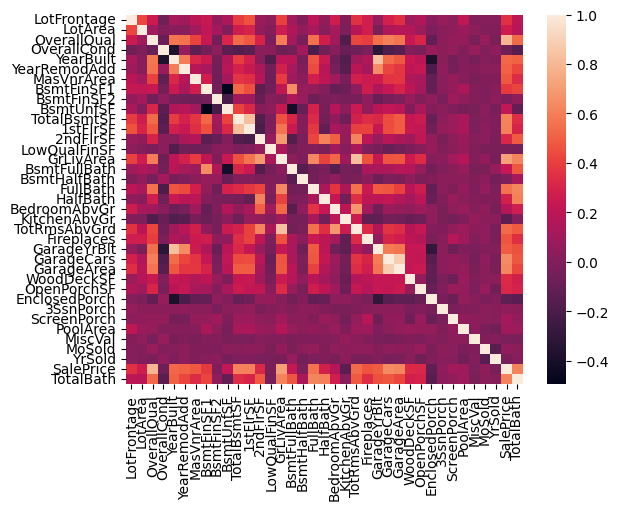

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
corr = df_numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Numerics

In [7]:
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'TotalBath'],
      dtype='object')

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.3517990965706778


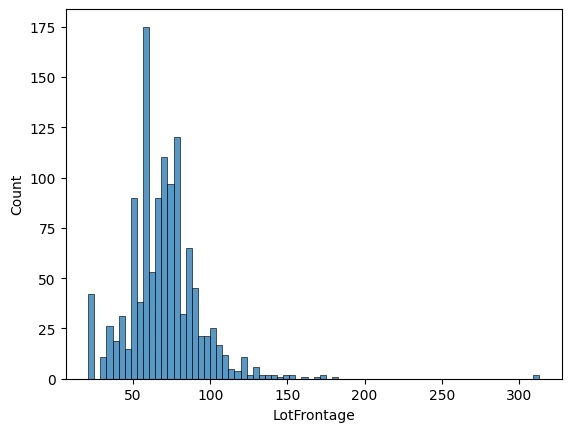

In [8]:
col = 'LotFrontage'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.2638433538714056


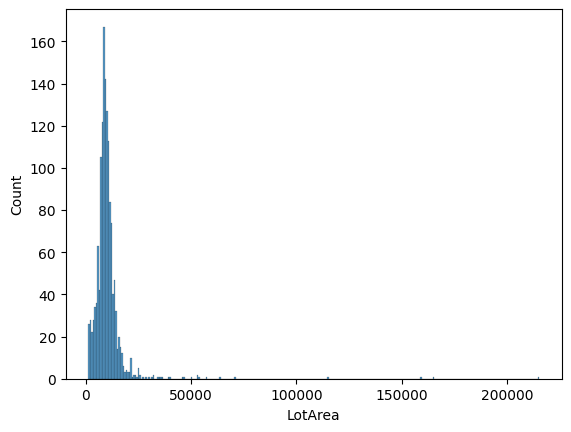

In [9]:
col = 'LotArea'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.790981600583805


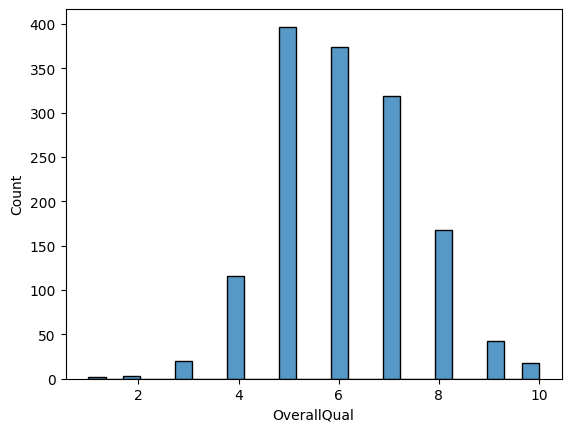

In [10]:
col = 'OverallQual'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.07785589404867806


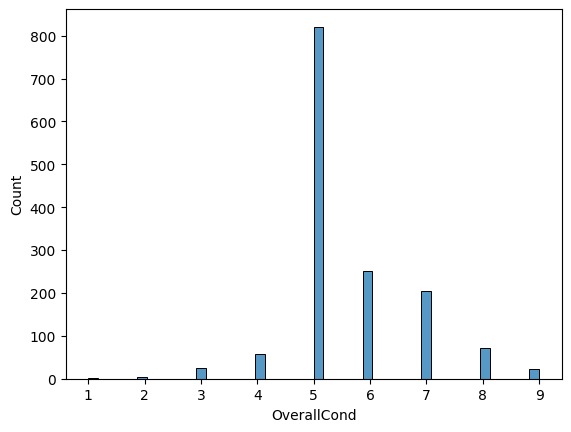

In [11]:
col = 'OverallCond'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.5228973328794971


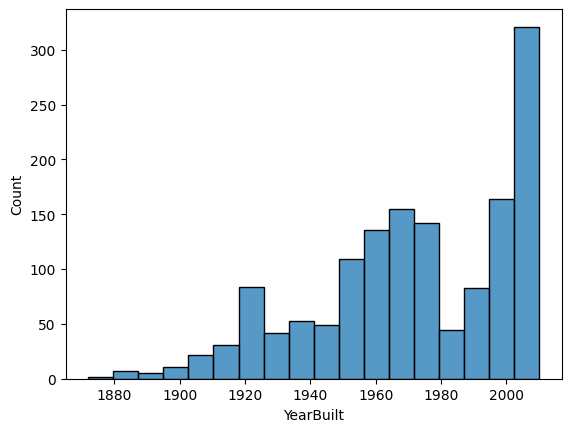

In [12]:
col = 'YearBuilt'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.5071009671113865


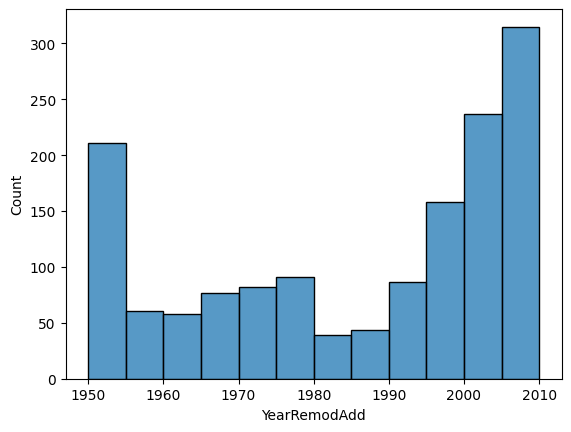

In [13]:
col = 'YearRemodAdd'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.4774930470957156


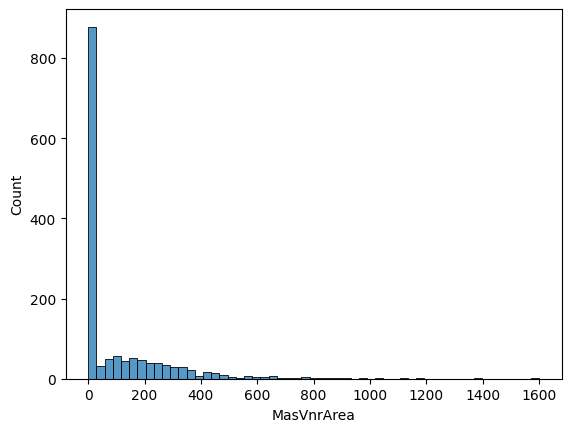

In [14]:
col = 'MasVnrArea'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.3864198062421533


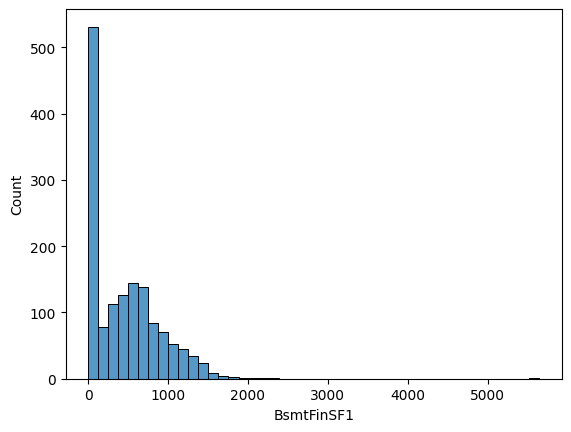

In [15]:
col = 'BsmtFinSF1'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.011378121450215144


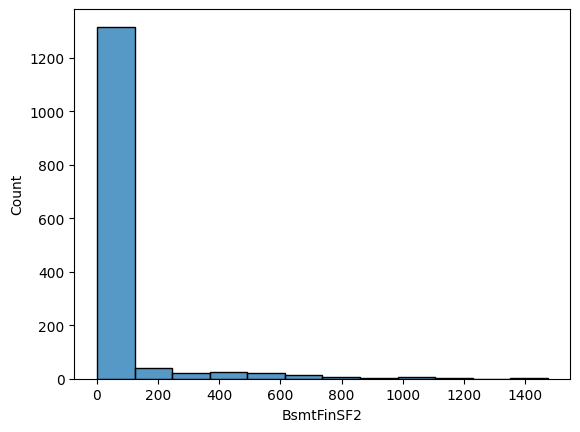

In [16]:
col = 'BsmtFinSF2'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.21447910554696892


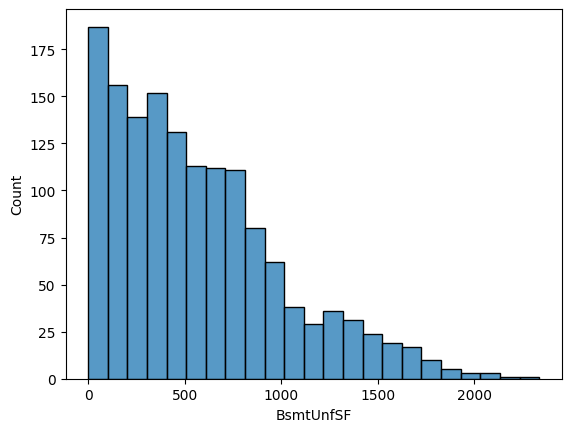

In [17]:
col = 'BsmtUnfSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.6135805515591953


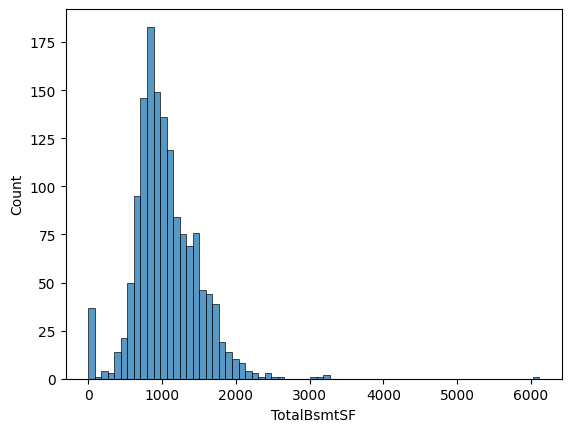

In [18]:
col = 'TotalBsmtSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.6058521846919149


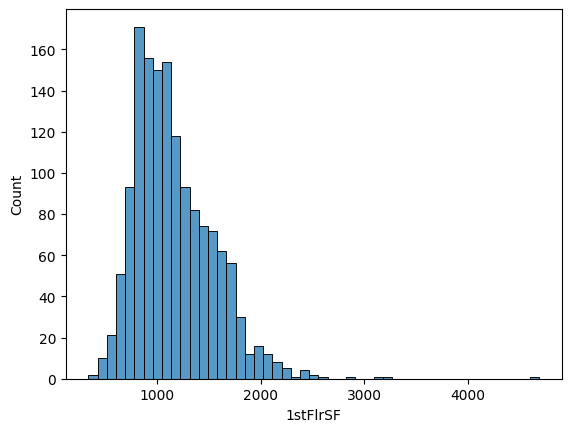

In [19]:
col = '1stFlrSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.31933380283206786


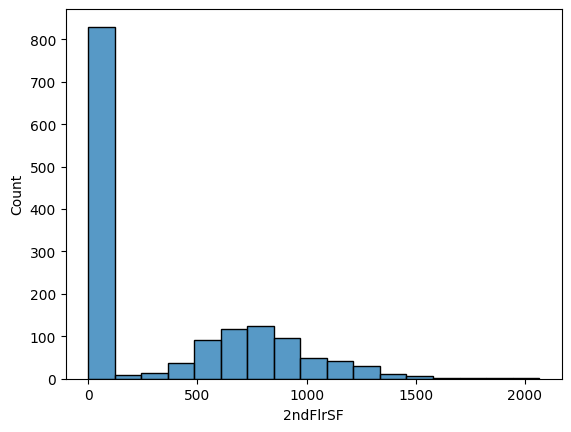

In [20]:
col = '2ndFlrSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.025606130000679538


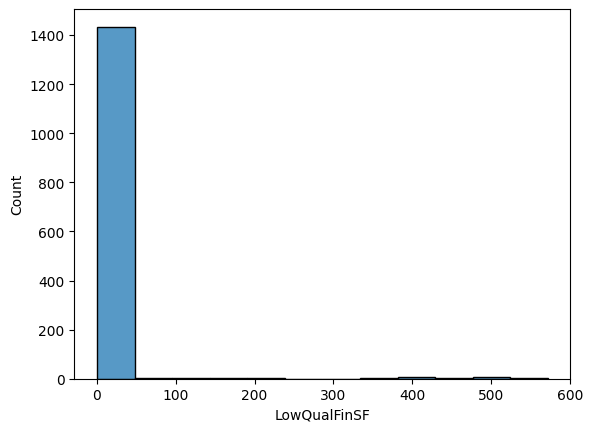

In [21]:
col = 'LowQualFinSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.7086244776126523


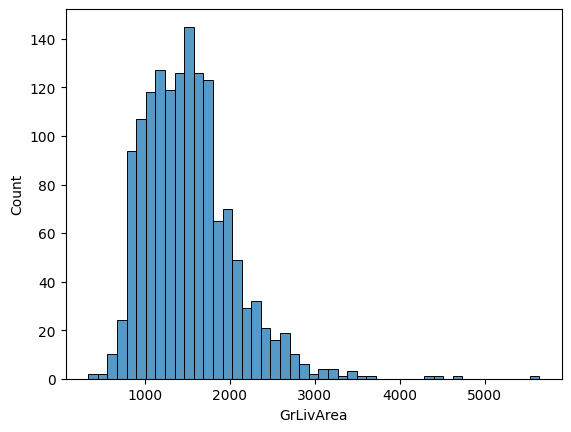

In [22]:
col = 'GrLivArea'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.016844154297359016


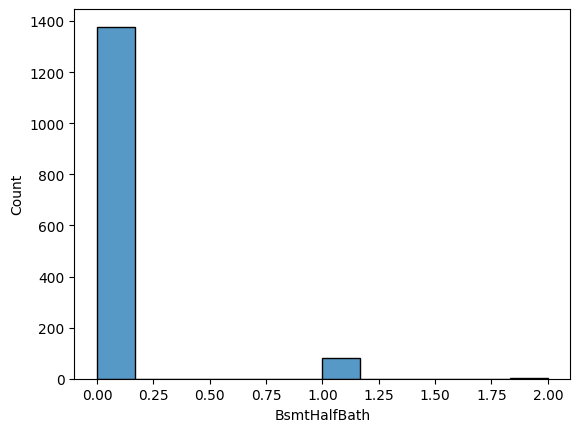

In [23]:
col = 'BsmtHalfBath'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.5606637627484461


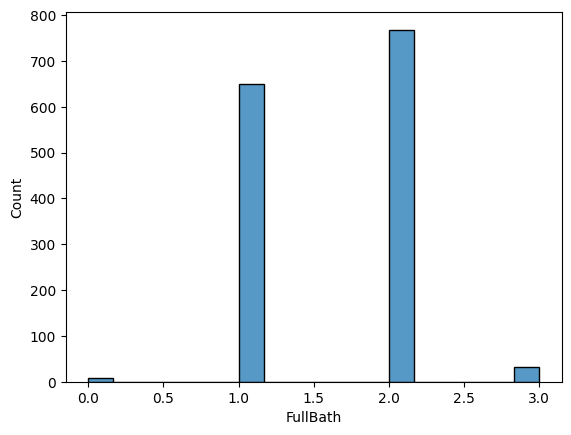

In [24]:
col = 'FullBath'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.28410767559478267


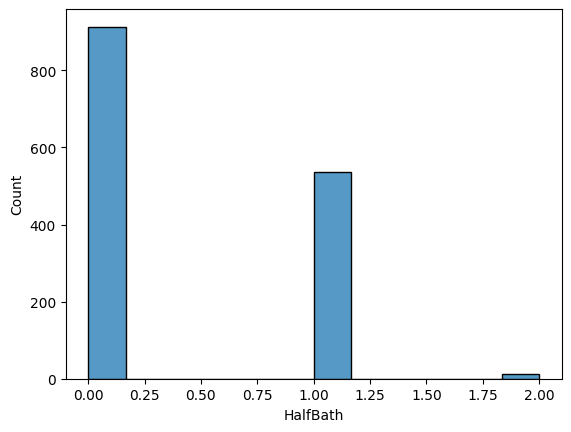

In [25]:
col = 'HalfBath'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.16821315430074005


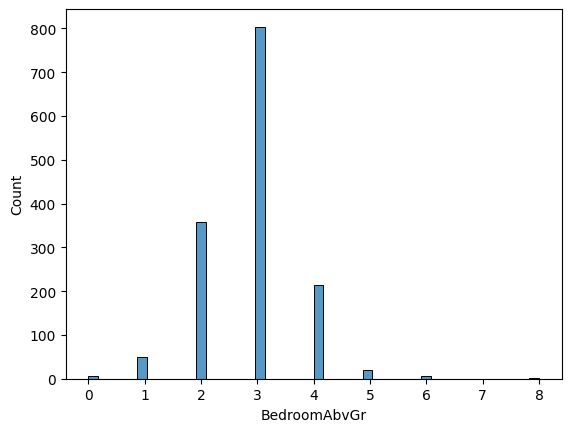

In [26]:
col = 'BedroomAbvGr'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.13590737084214125


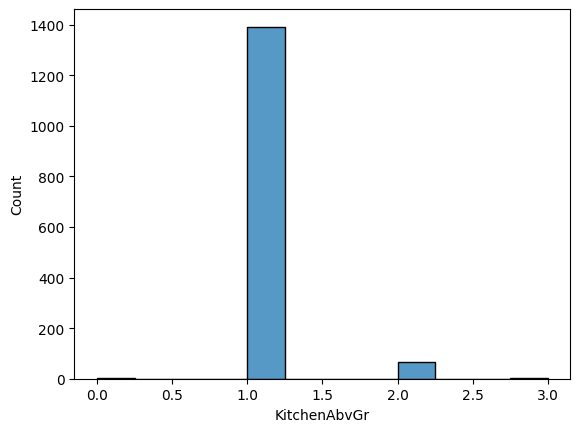

In [27]:
col = 'KitchenAbvGr'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.5337231555820283


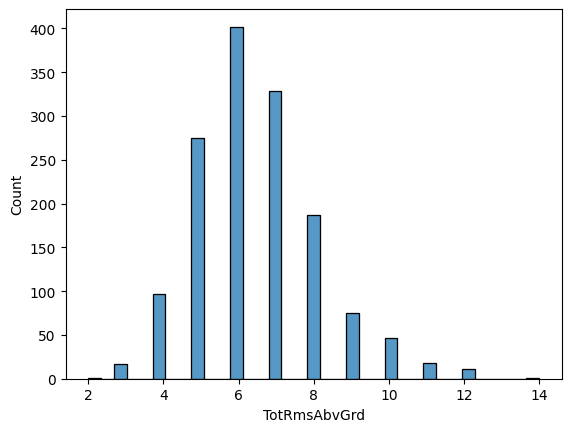

In [28]:
col = 'TotRmsAbvGrd'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.4669288367515278


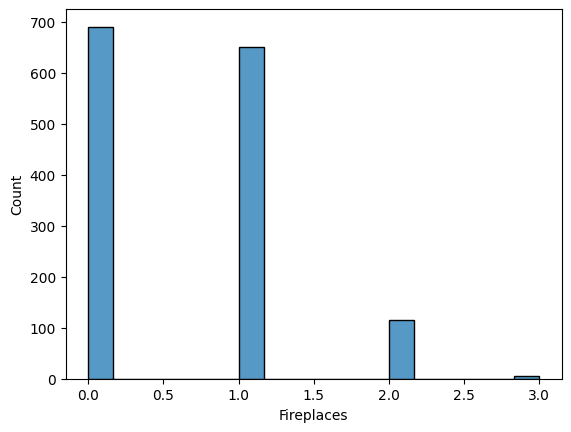

In [29]:
col = 'Fireplaces'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.48636167748786097


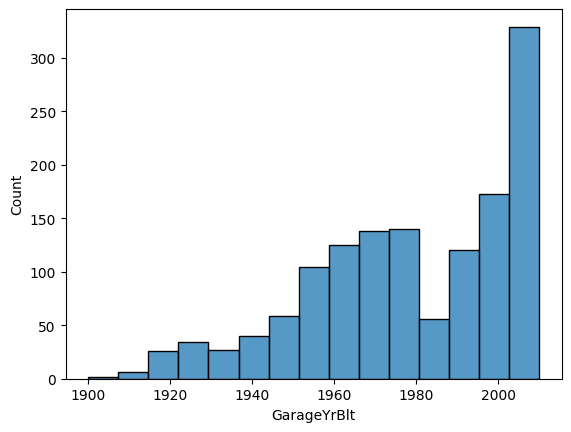

In [30]:
col = 'GarageYrBlt'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.6404091972583521


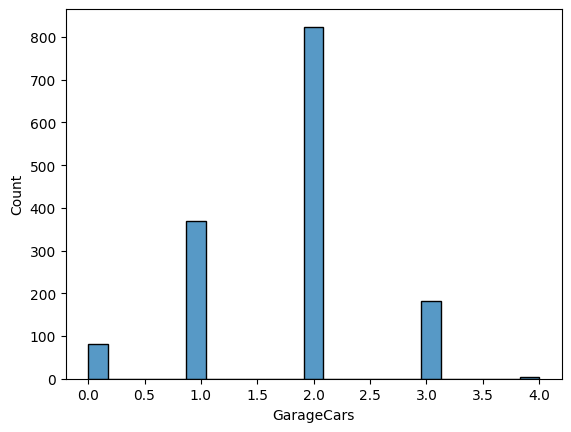

In [31]:
col = 'GarageCars'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.6234314389183618


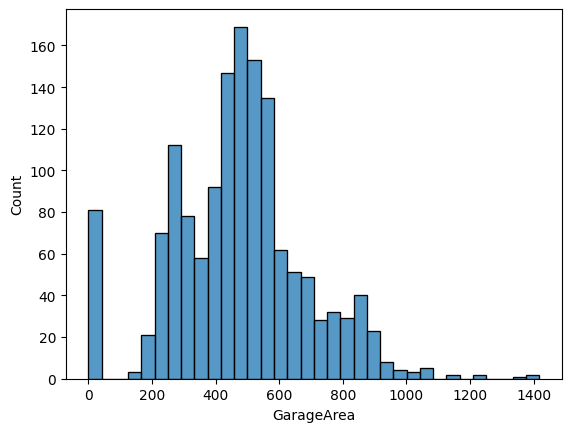

In [32]:
col = 'GarageArea'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.3244134445681298


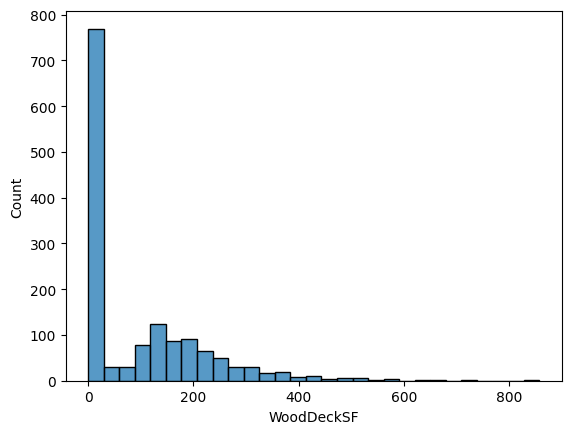

In [33]:
col = 'WoodDeckSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.31585622711605527


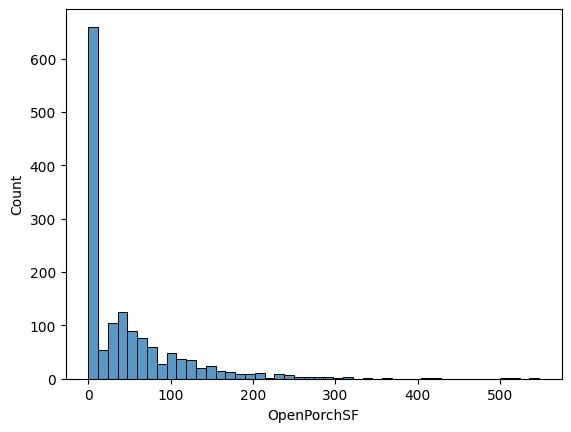

In [34]:
col = 'OpenPorchSF'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.12857795792595678


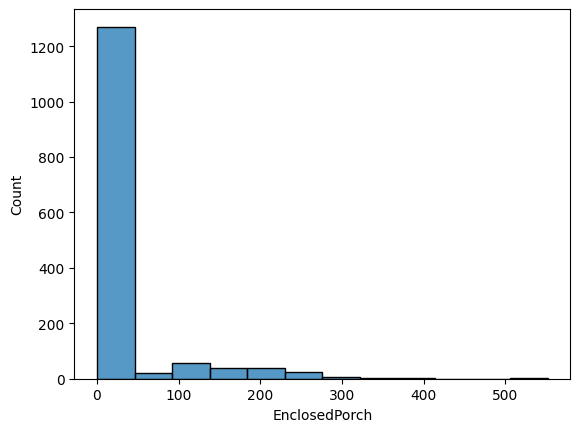

In [35]:
col = 'EnclosedPorch'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.04458366533574841


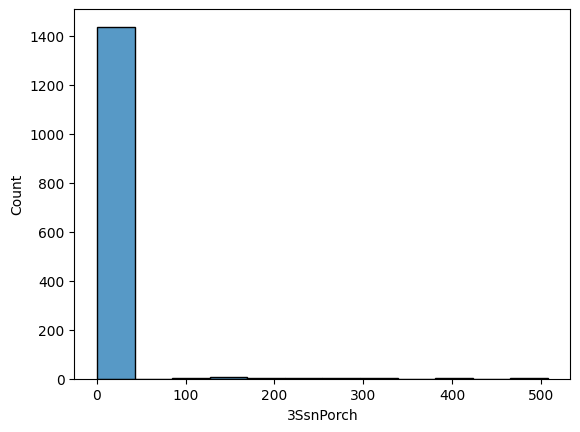

In [36]:
col = '3SsnPorch'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.1114465711429112


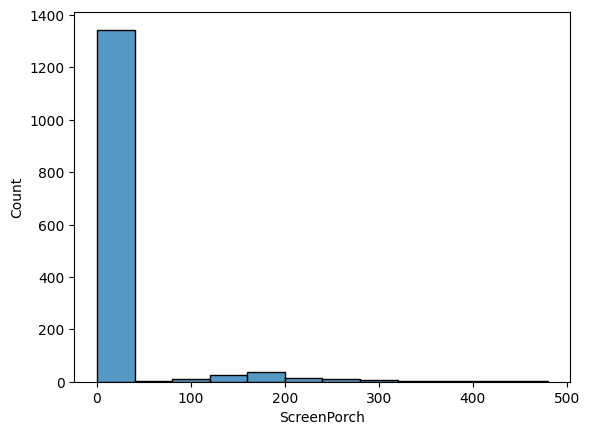

In [37]:
col = 'ScreenPorch'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.09240354949187322


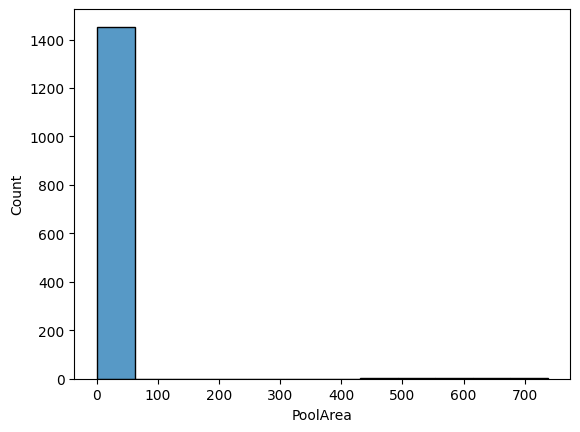

In [38]:
col = 'PoolArea'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.021189579640303262


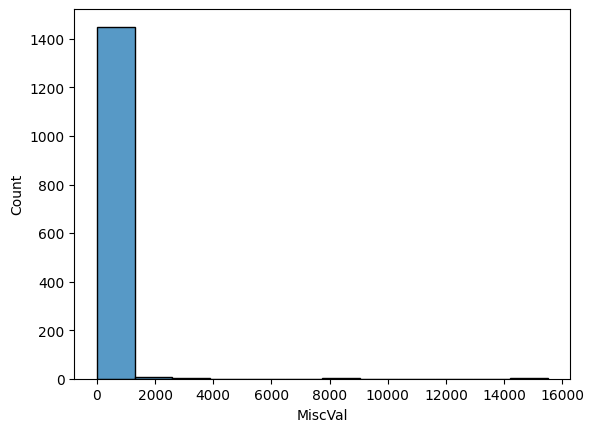

In [39]:
col = 'MiscVal'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 0.04643224522381934


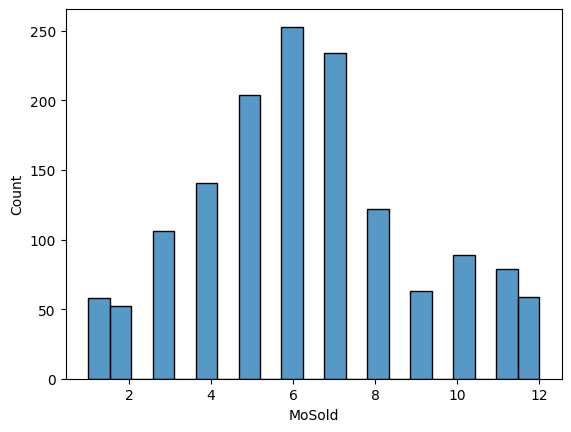

In [40]:
col = 'MoSold'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: -0.028922585168730326


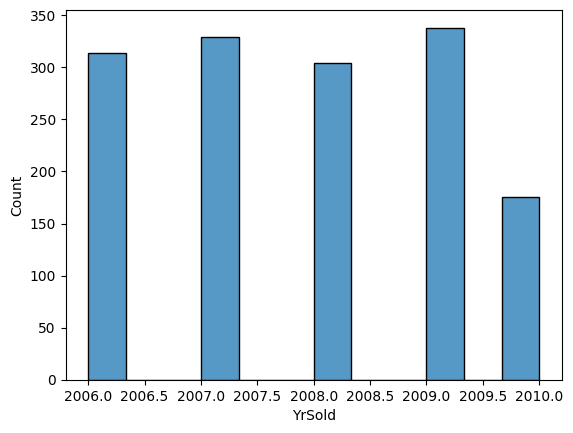

In [41]:
col = 'YrSold'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

Axes(0.125,0.11;0.775x0.77)
Correlation with target variable: 1.0


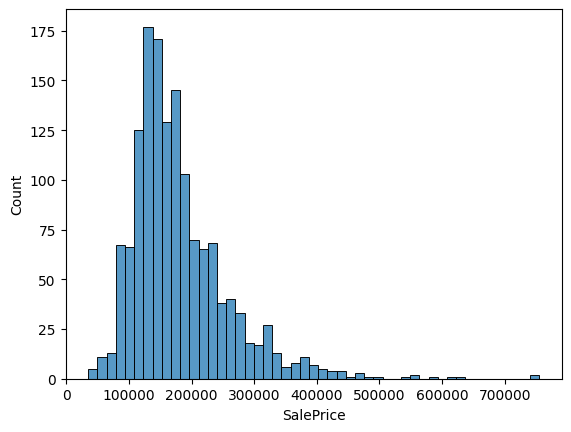

In [42]:
col = 'SalePrice'
print(sns.histplot(data=df_numeric[col]))
print("Correlation with target variable:", df_numeric[col].corr(df_numeric['SalePrice']))

# Categoricals

In [43]:
df.select_dtypes(include='object').columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

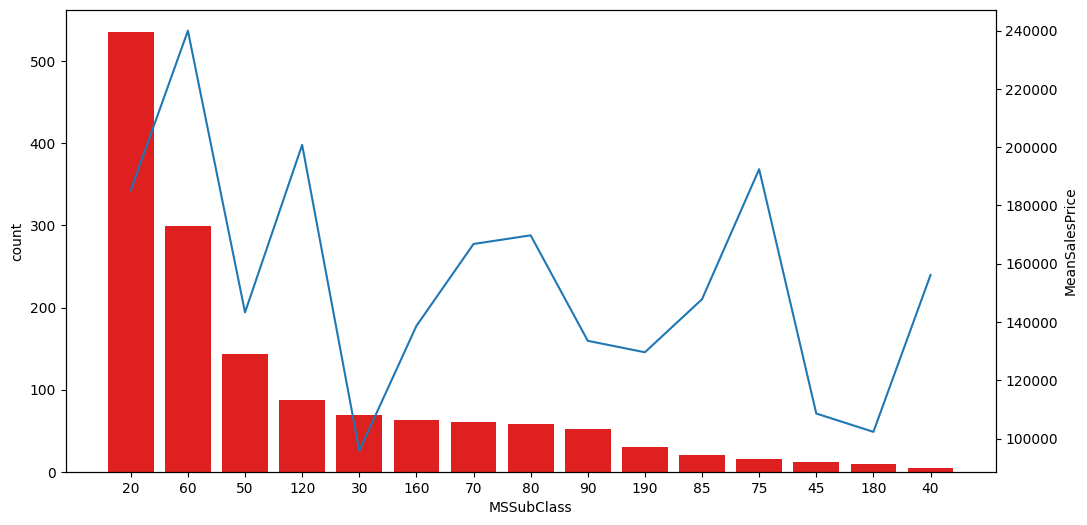

In [44]:
group = 'MSSubClass'
categorical_plot(df, group)

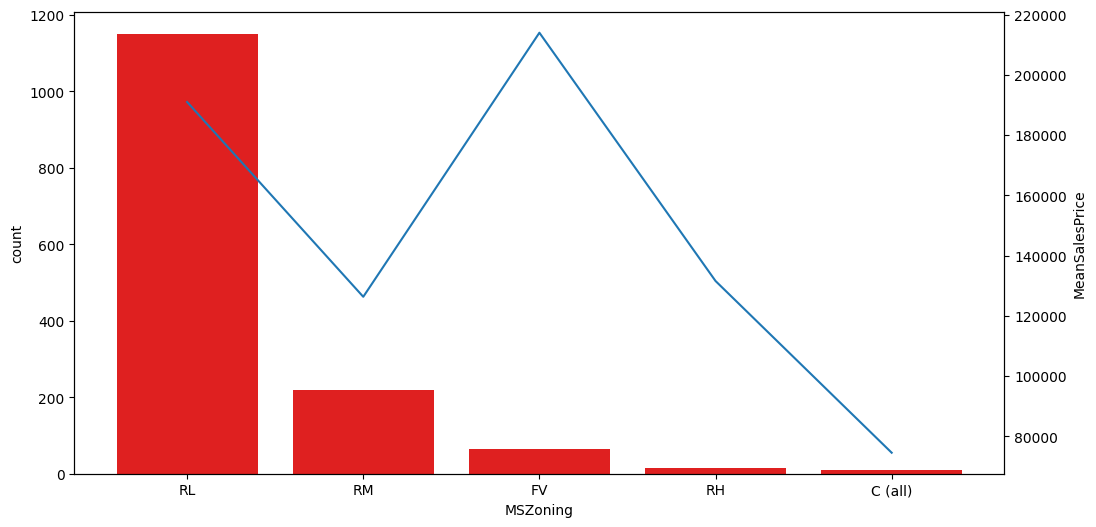

In [45]:
group = 'MSZoning'
categorical_plot(df, group)

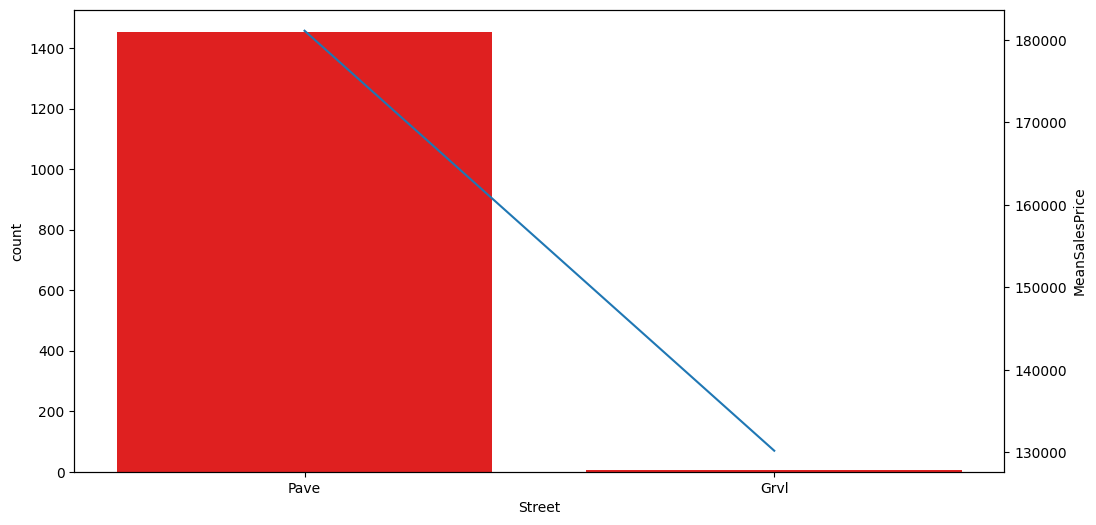

In [46]:
group = 'Street'
categorical_plot(df, group)

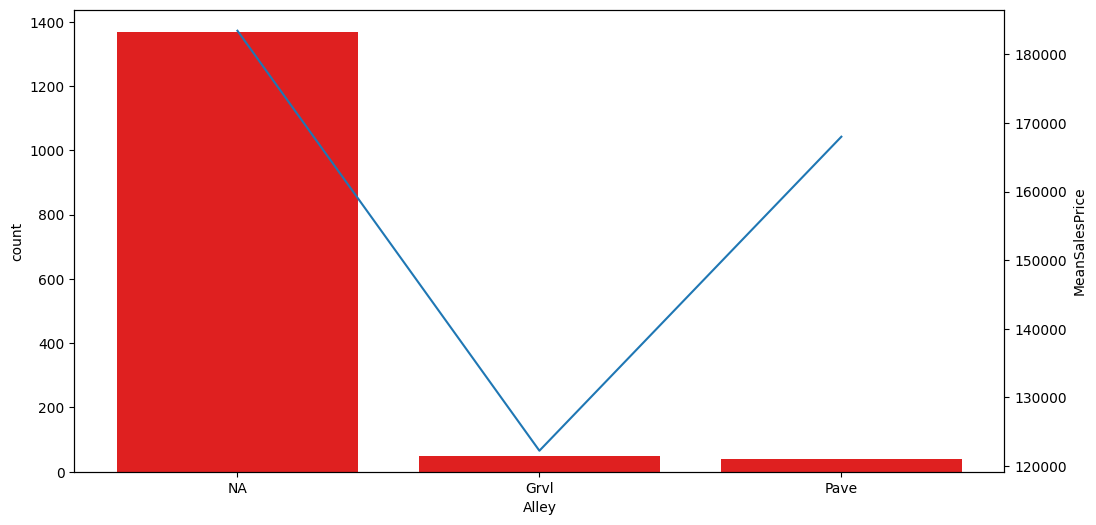

In [47]:
group = 'Alley'
categorical_plot(df, group)

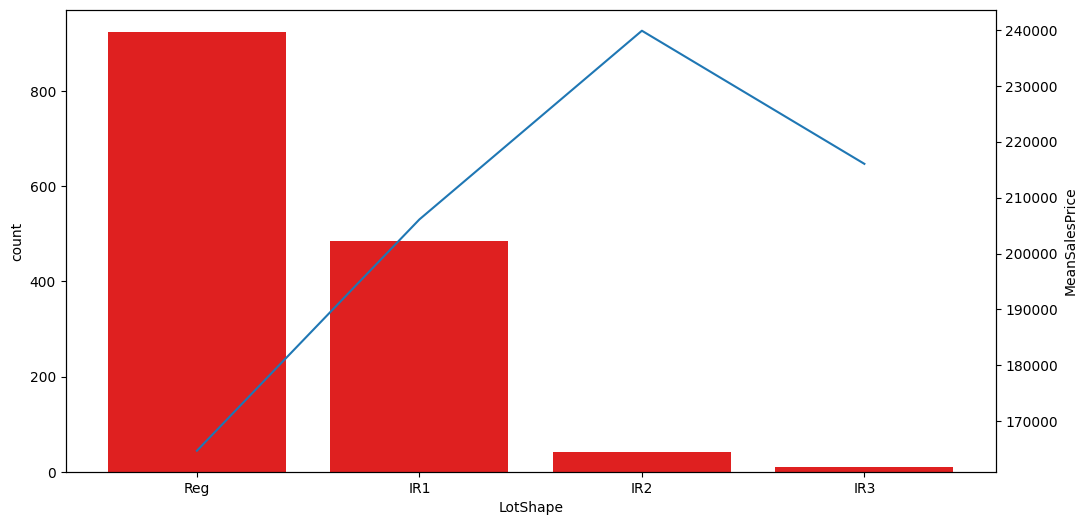

In [48]:
group = 'LotShape'
categorical_plot(df, group)

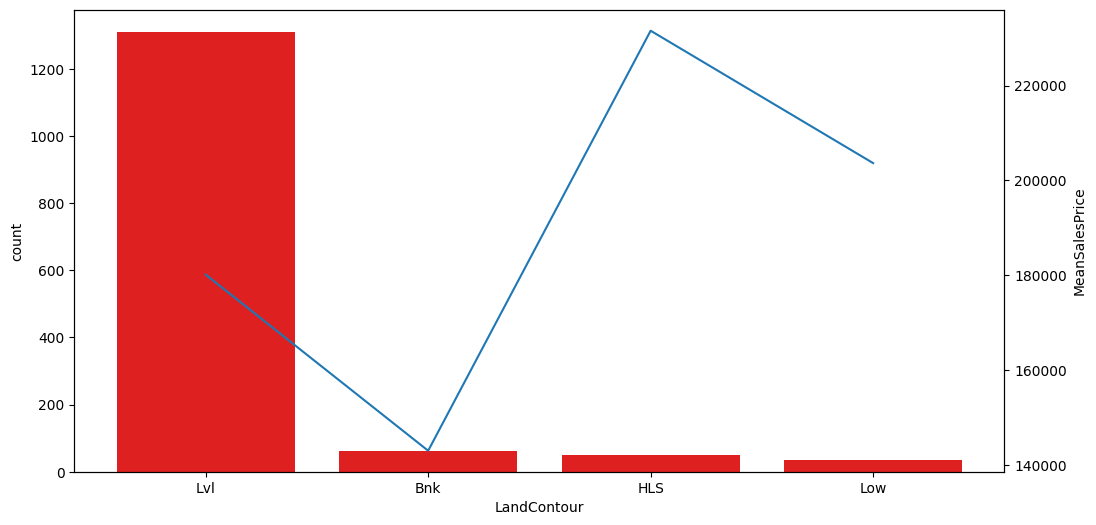

In [49]:
group = 'LandContour'
categorical_plot(df, group)

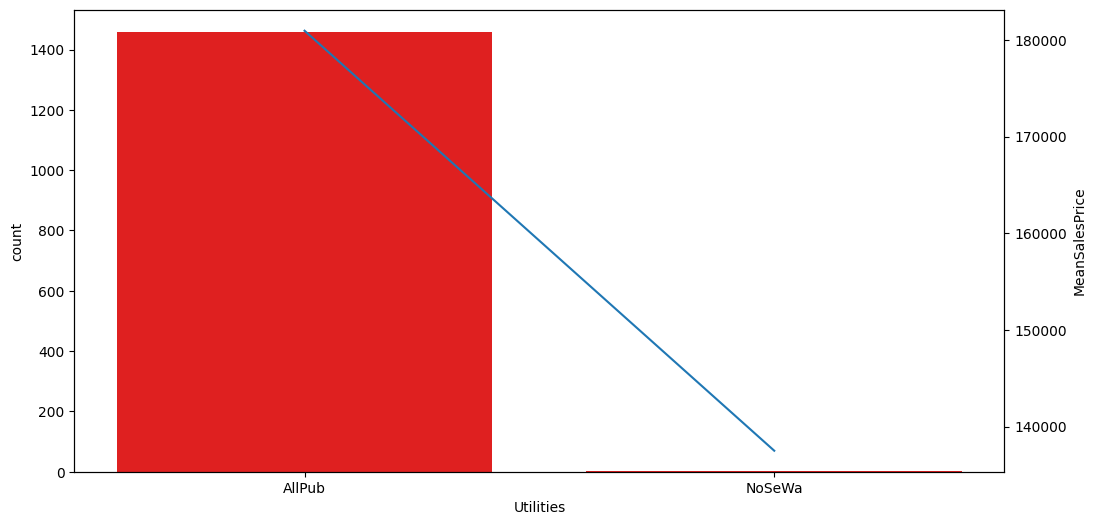

In [50]:
group = 'Utilities'
categorical_plot(df, group)

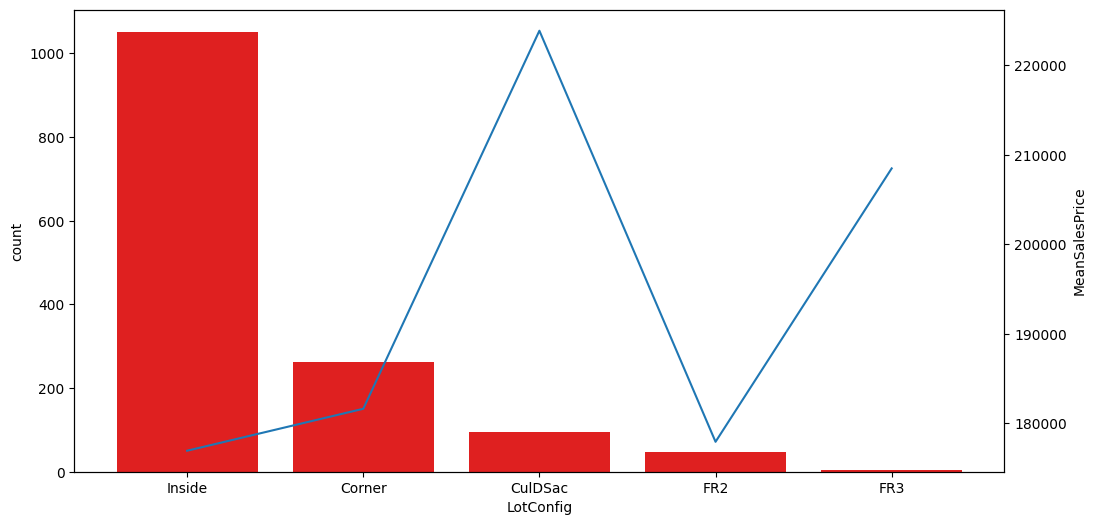

In [51]:
group = 'LotConfig'
categorical_plot(df, group)

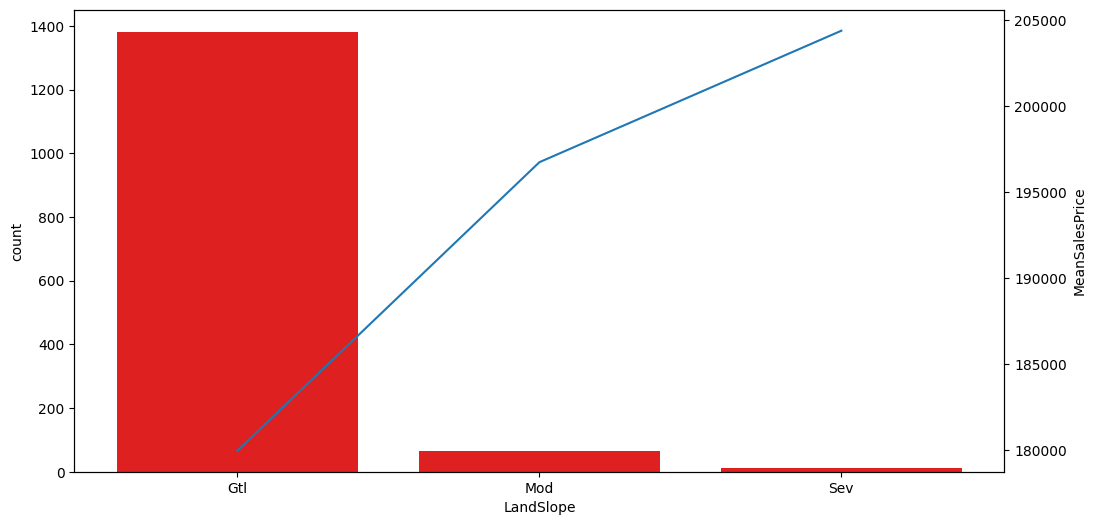

In [52]:
group = 'LandSlope'
categorical_plot(df, group)

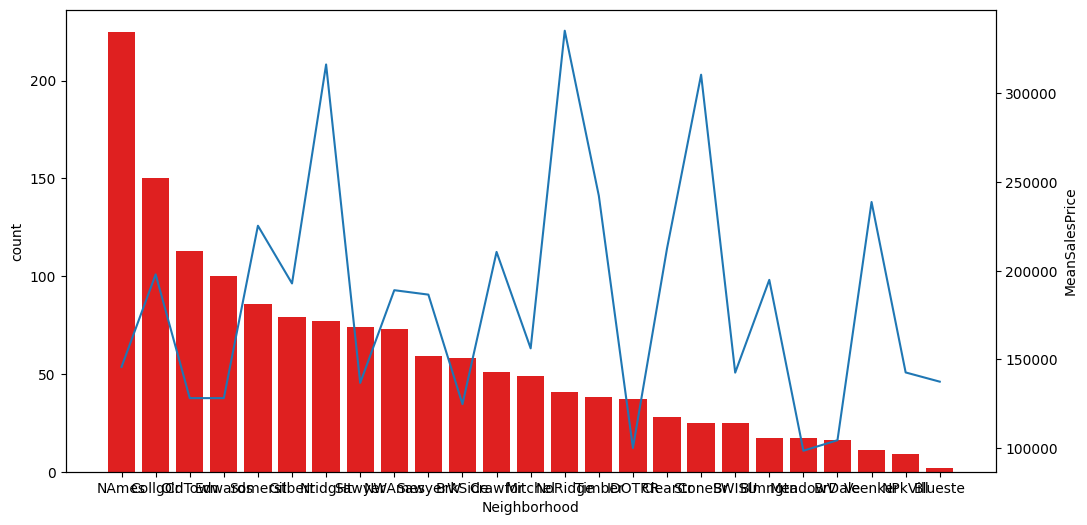

In [53]:
group = 'Neighborhood'
categorical_plot(df, group)

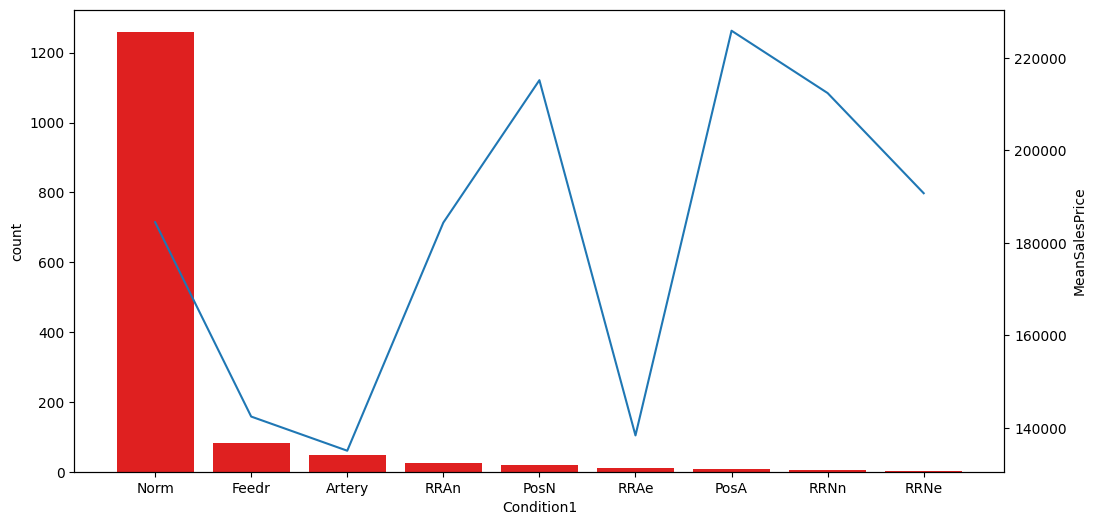

In [54]:
group = 'Condition1'
categorical_plot(df, group)

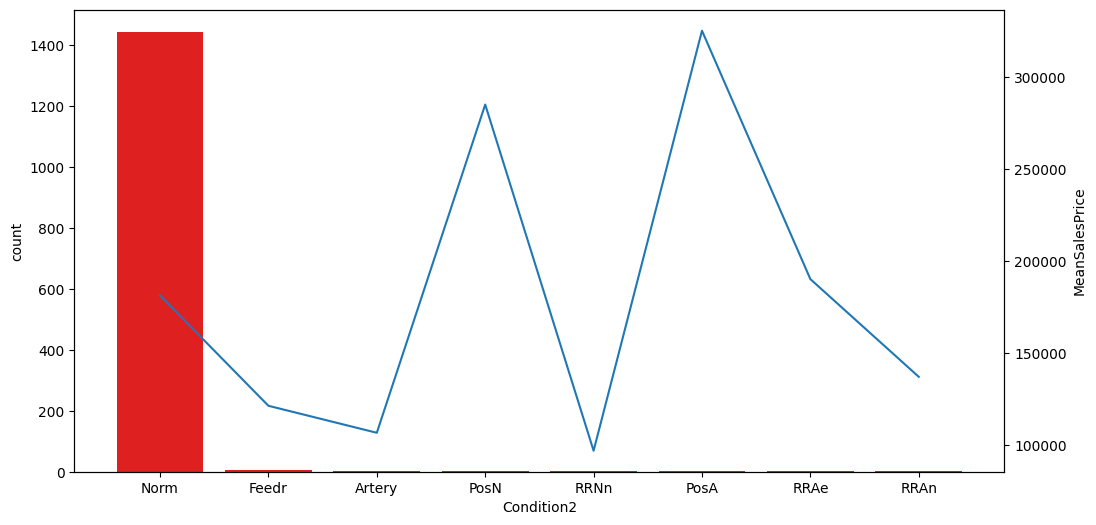

In [55]:
group = 'Condition2'
categorical_plot(df, group)

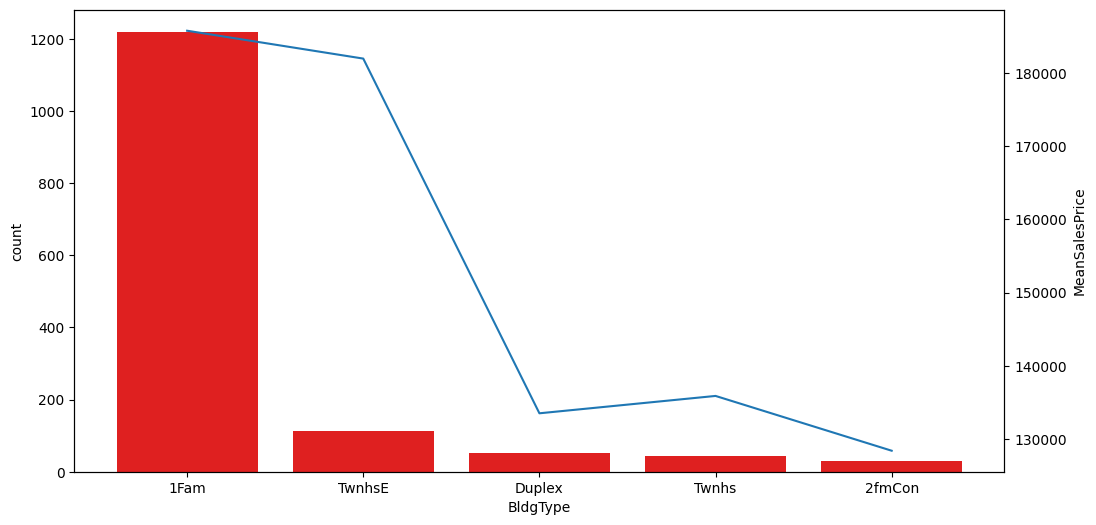

In [56]:
group = 'BldgType'
categorical_plot(df, group)

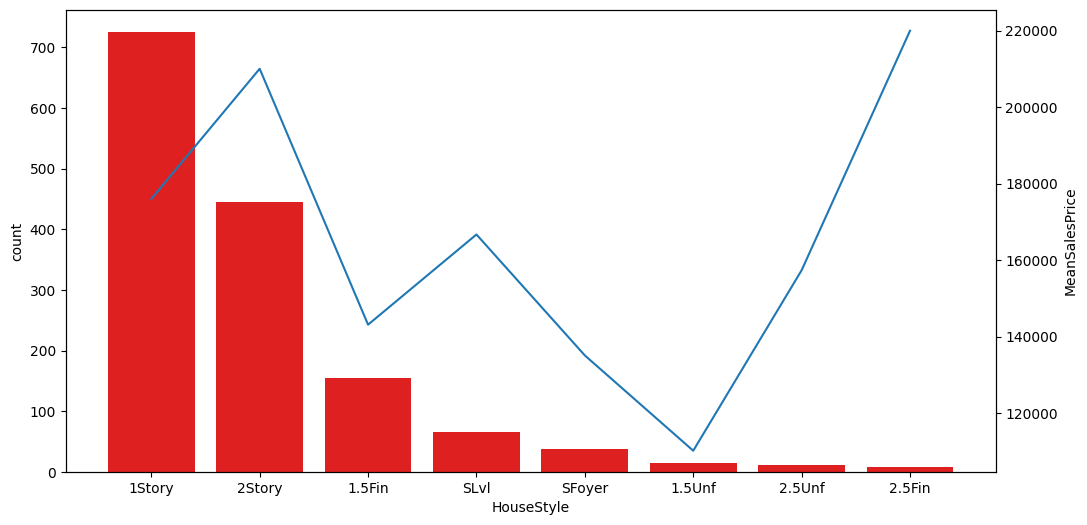

In [57]:
group = 'HouseStyle'
categorical_plot(df, group)

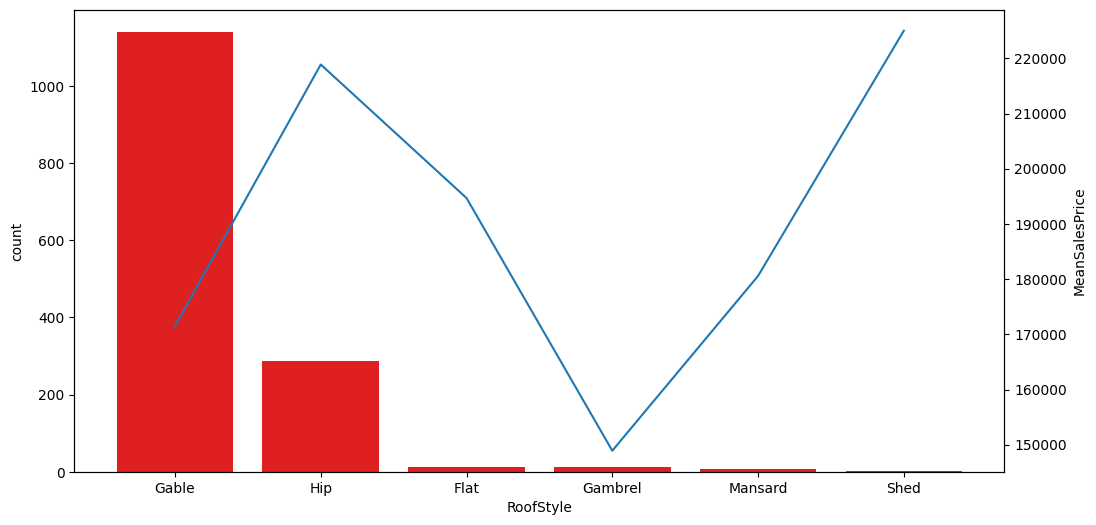

In [58]:
group = 'RoofStyle'
categorical_plot(df, group)

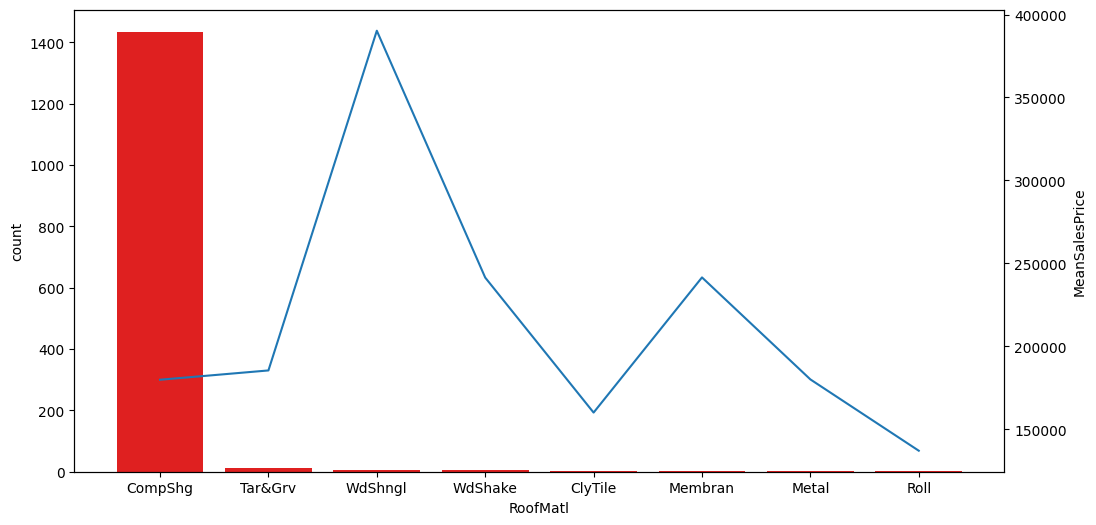

In [59]:
group = 'RoofMatl'
categorical_plot(df, group)

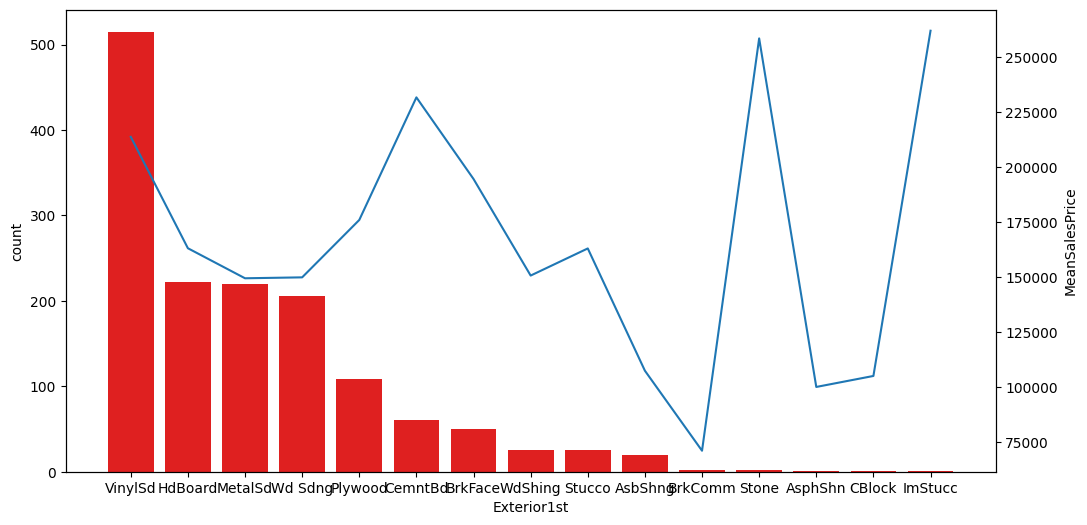

In [60]:
group = 'Exterior1st'
categorical_plot(df, group)

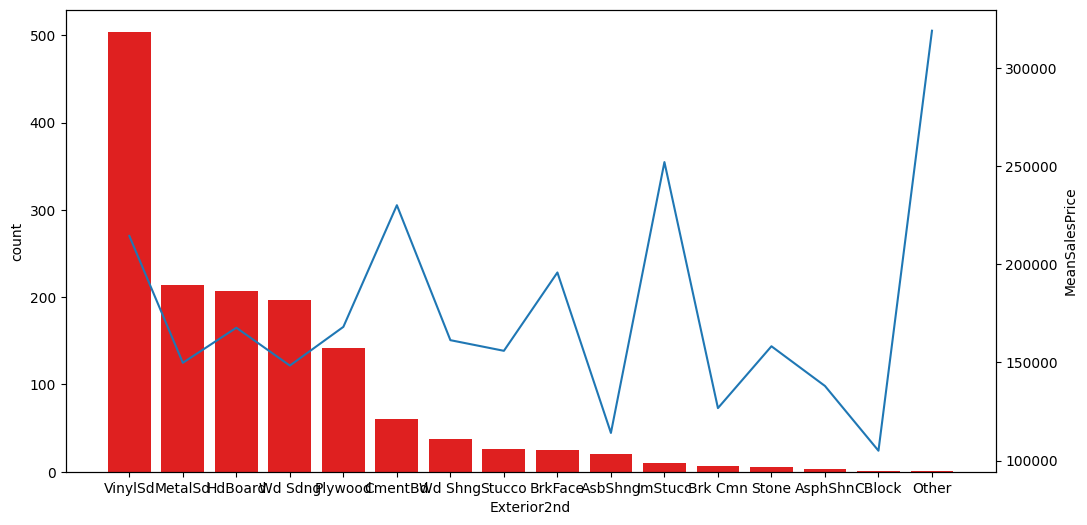

In [61]:
group = 'Exterior2nd'
categorical_plot(df, group)

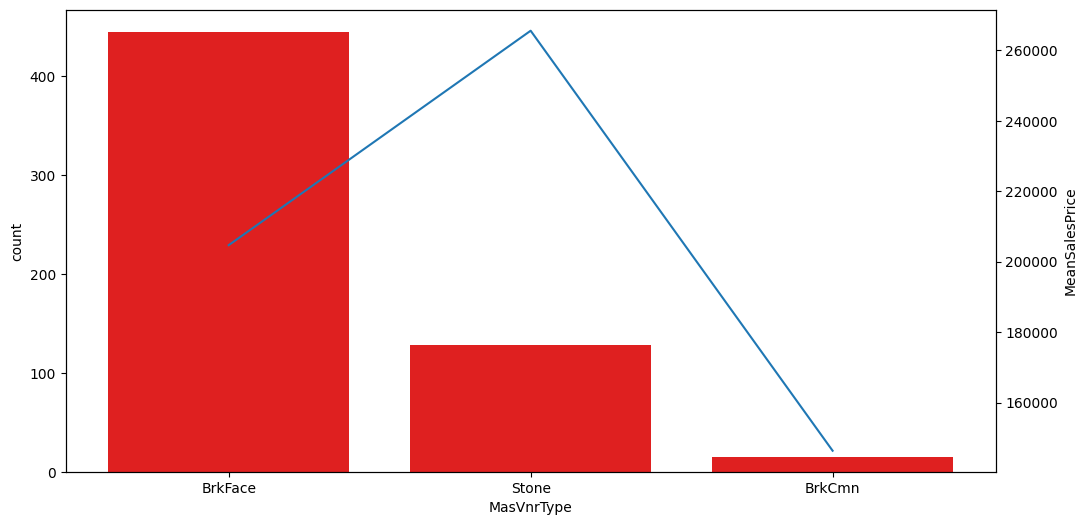

In [62]:
group = 'MasVnrType'
categorical_plot(df, group)

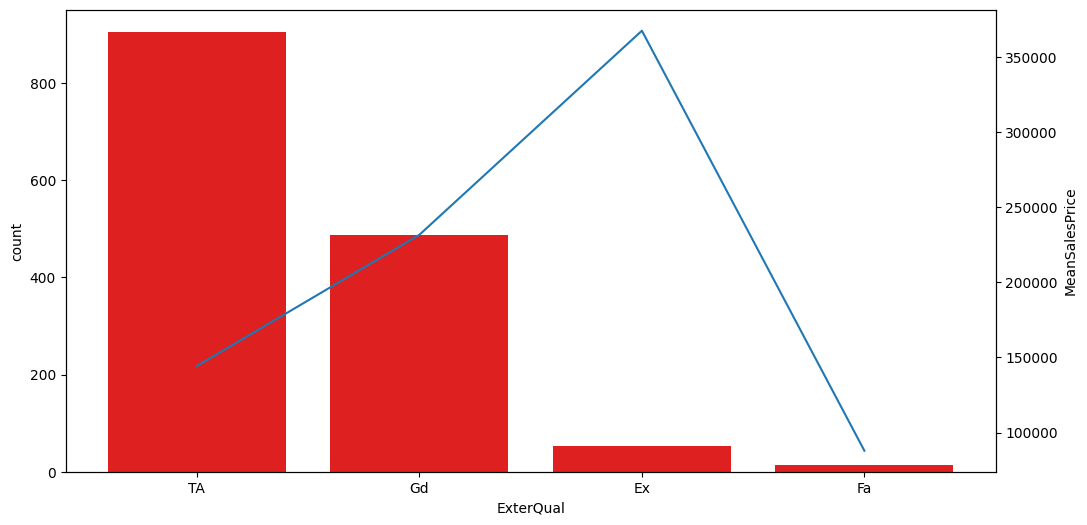

In [63]:
group = 'ExterQual'
categorical_plot(df, group)

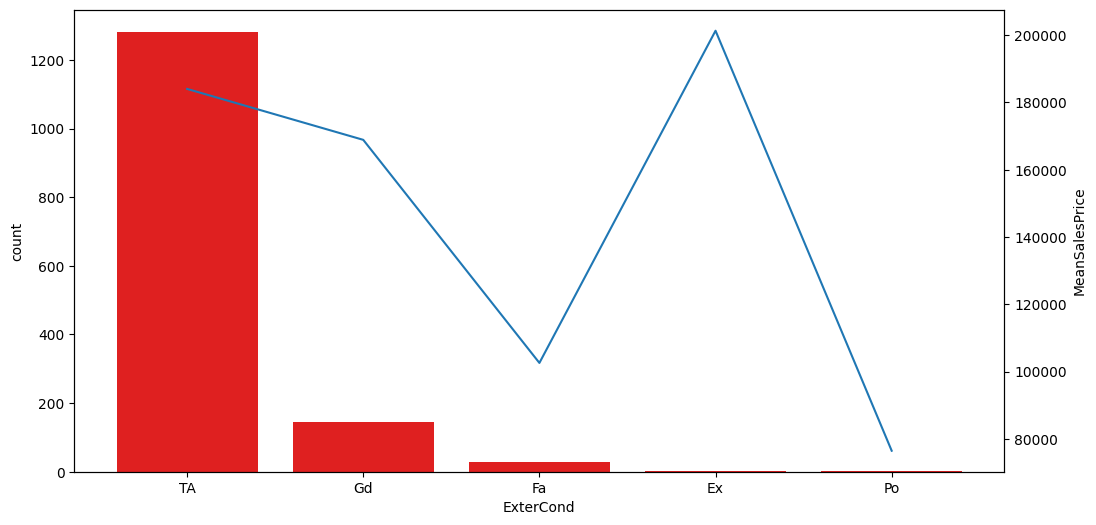

In [64]:
group = 'ExterCond'
categorical_plot(df, group)

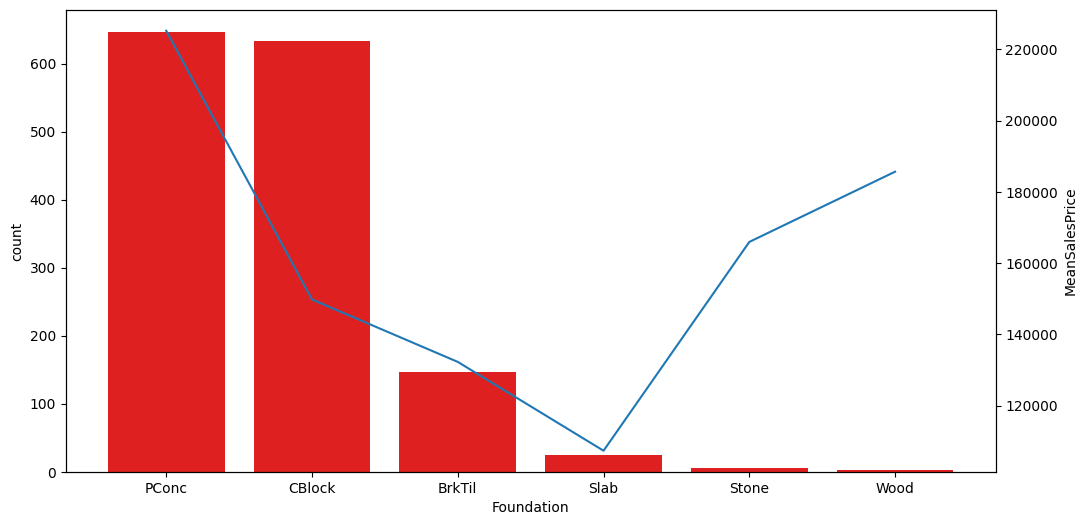

In [65]:
group = 'Foundation'
categorical_plot(df, group)

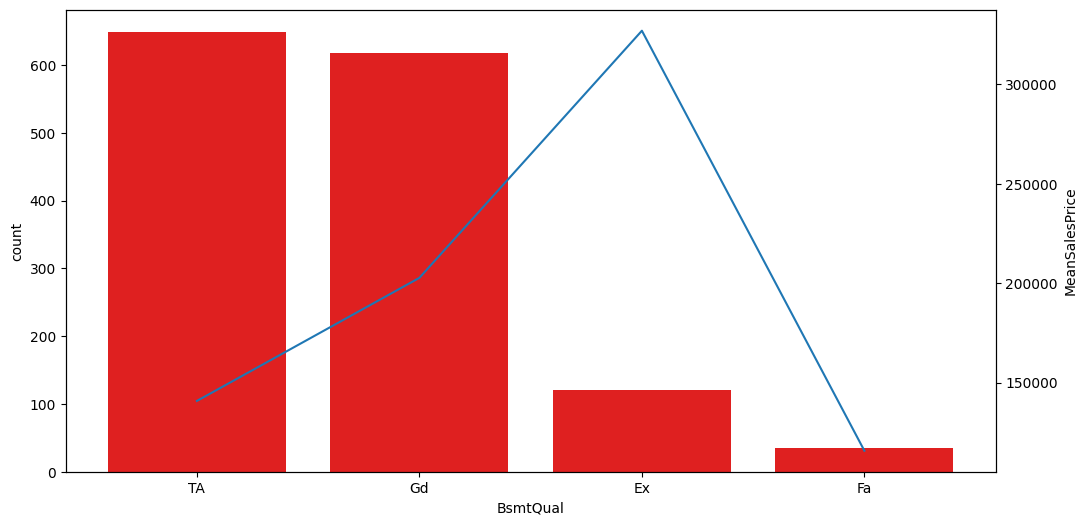

In [66]:
group = 'BsmtQual'
categorical_plot(df, group)

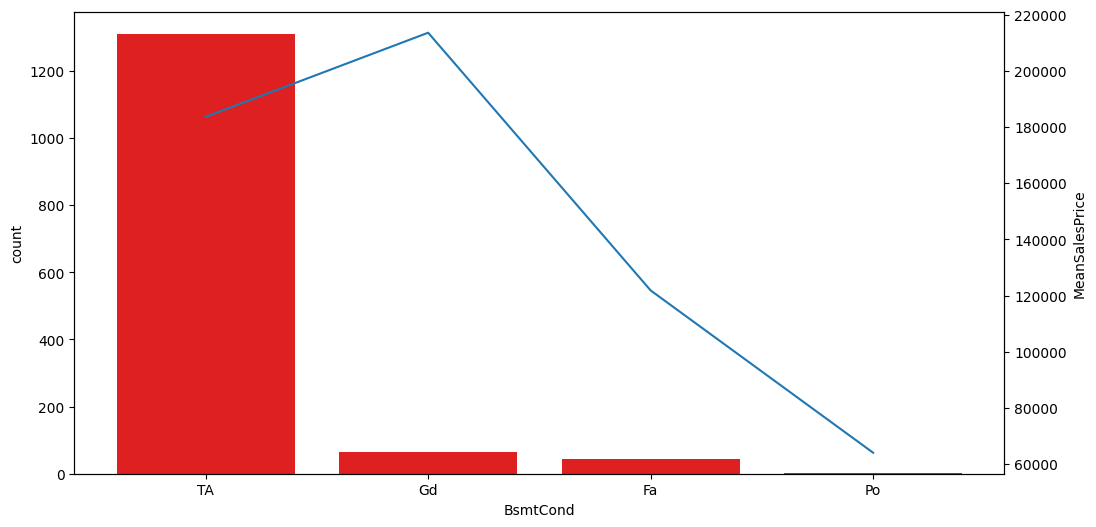

In [67]:
group = 'BsmtCond'
categorical_plot(df, group)

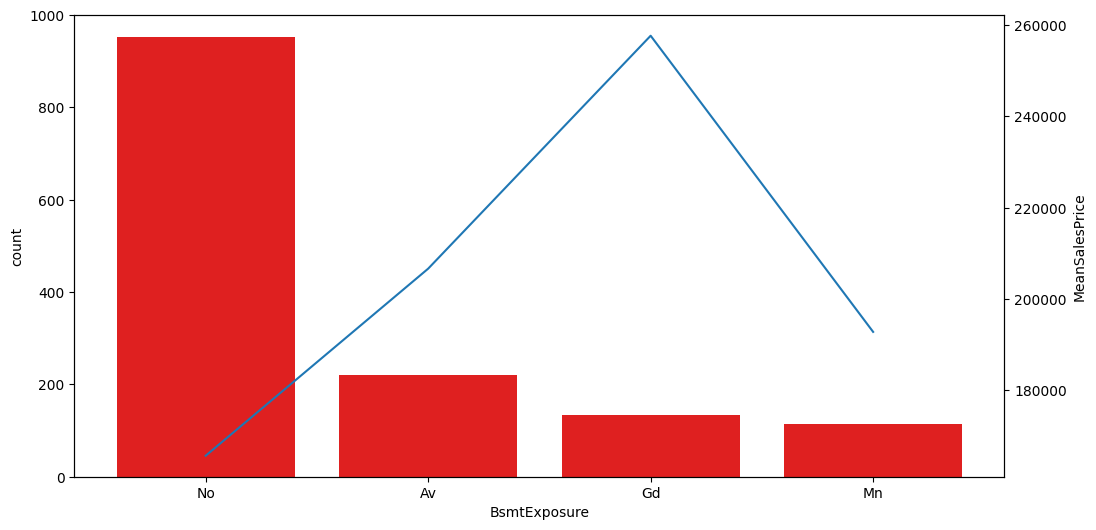

In [68]:
group = 'BsmtExposure'
categorical_plot(df, group)

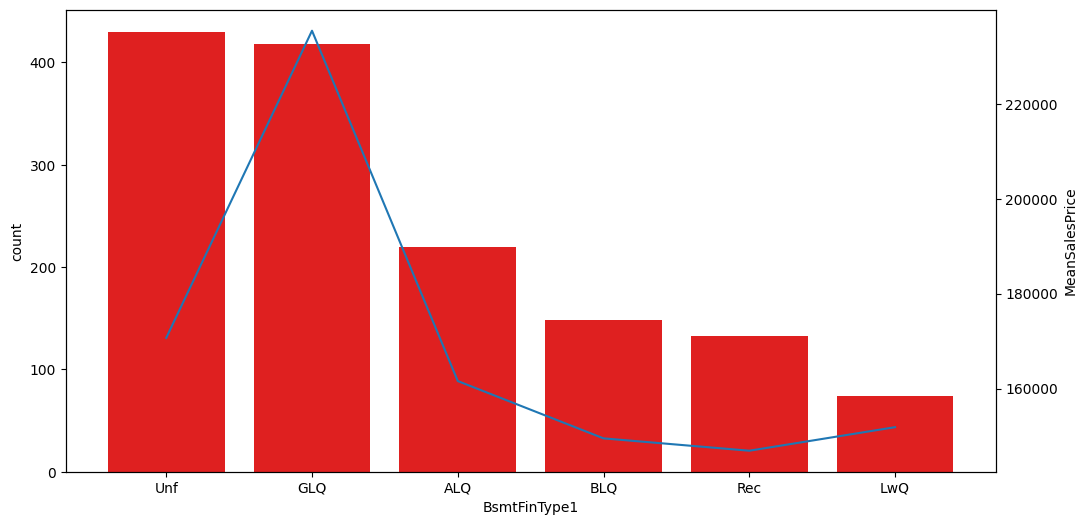

In [69]:
group = 'BsmtFinType1'
categorical_plot(df, group)

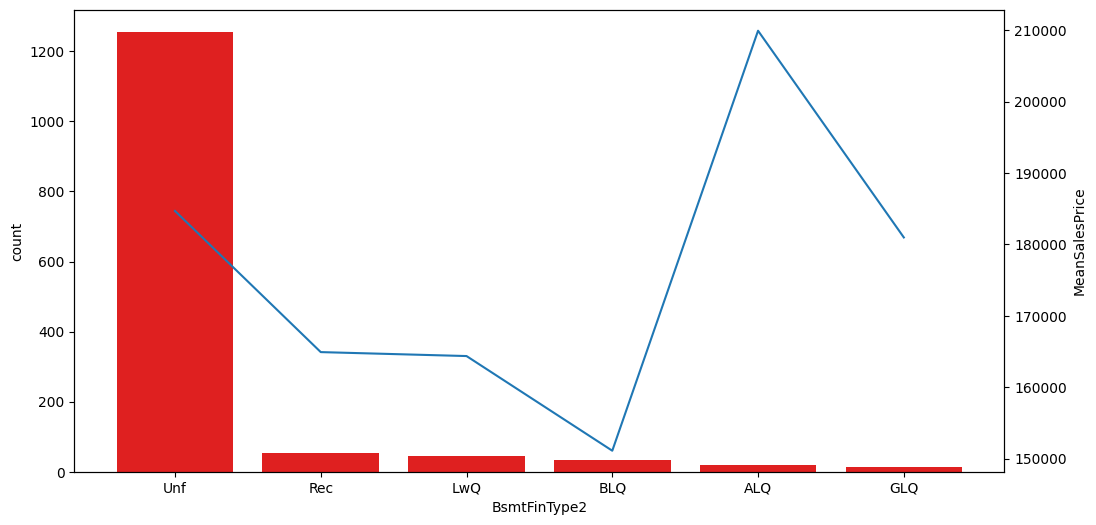

In [70]:
group = 'BsmtFinType2'
categorical_plot(df, group)

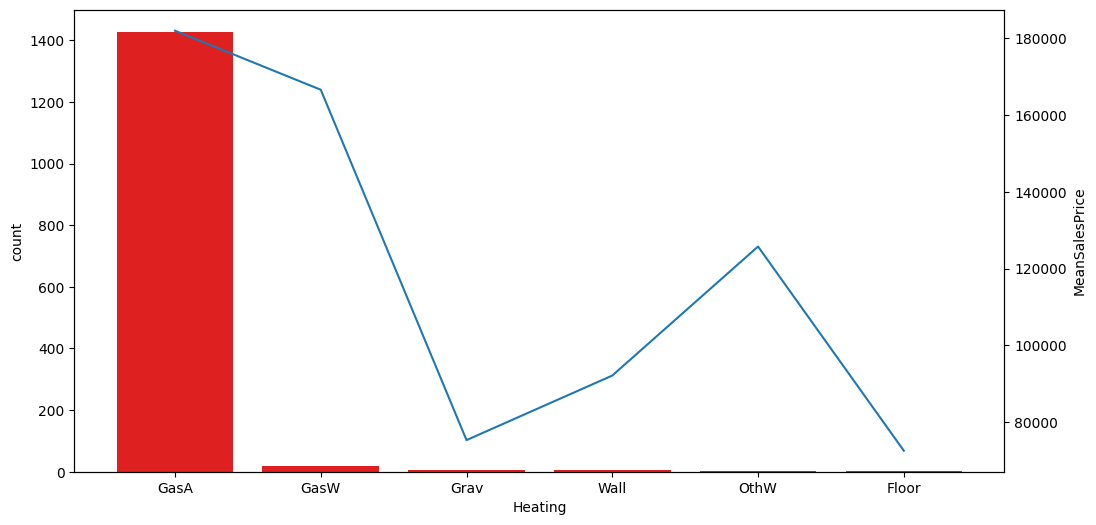

In [71]:
group = 'Heating'
categorical_plot(df, group)

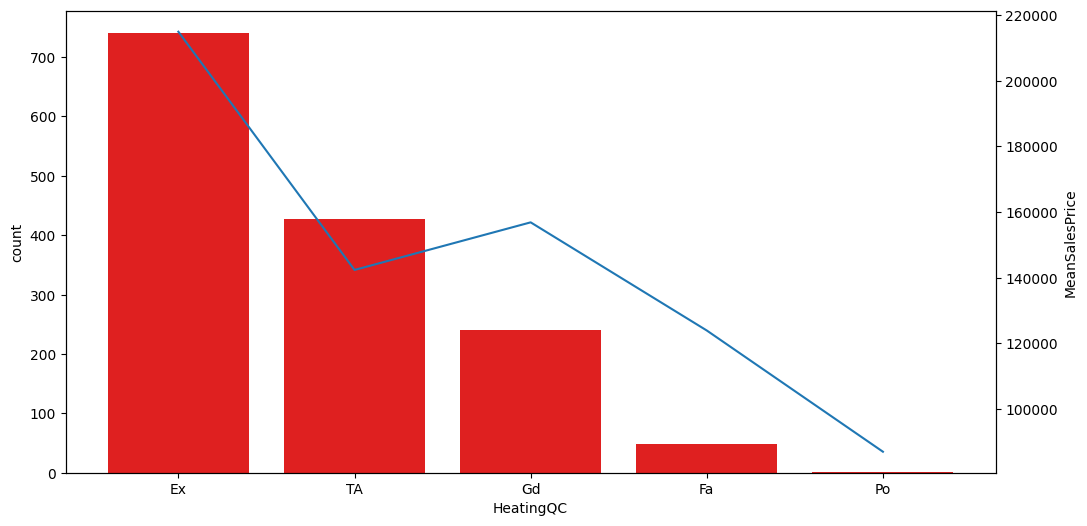

In [72]:
group = 'HeatingQC'
categorical_plot(df, group)

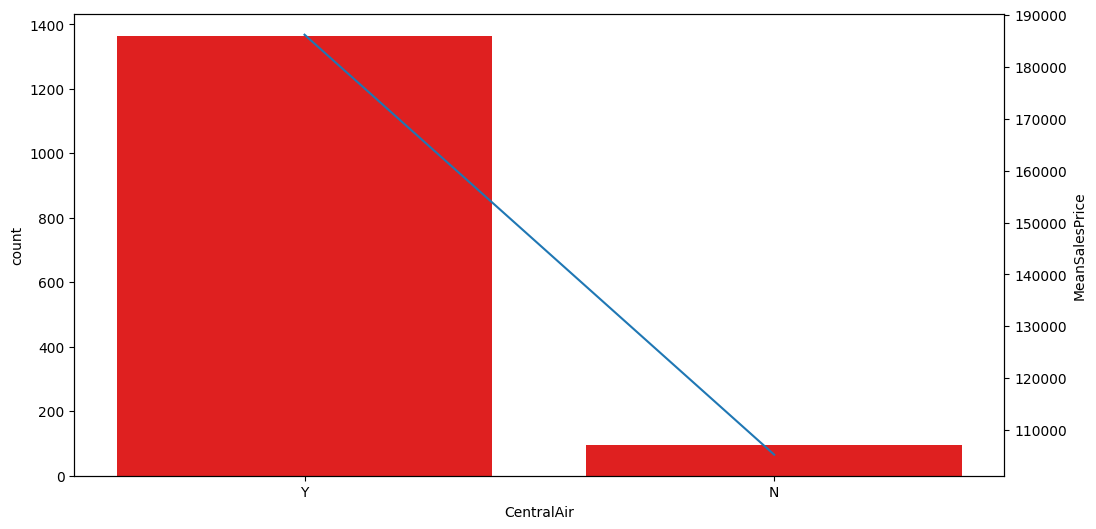

In [73]:
group = 'CentralAir'
categorical_plot(df, group)

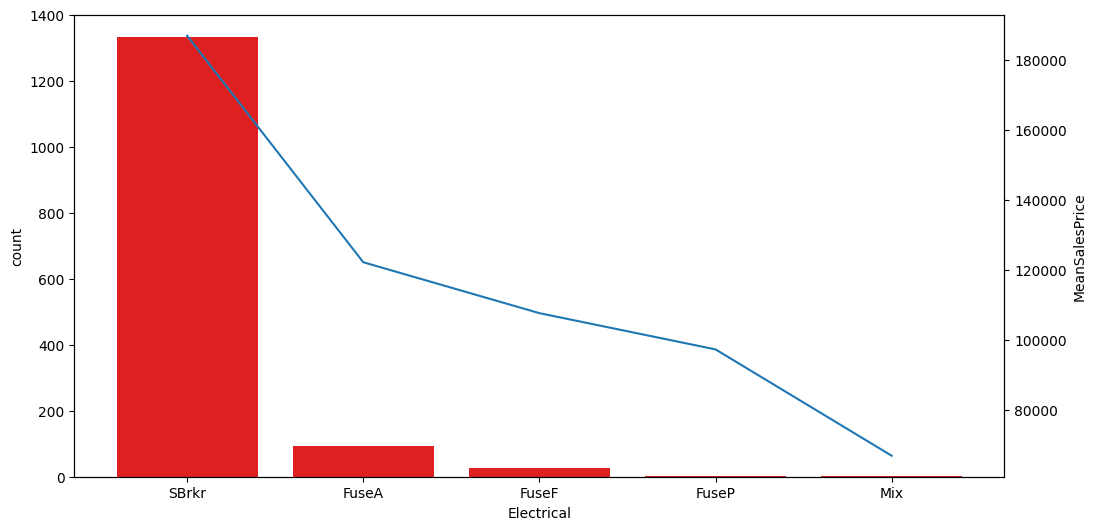

In [74]:
group = 'Electrical'
categorical_plot(df, group)

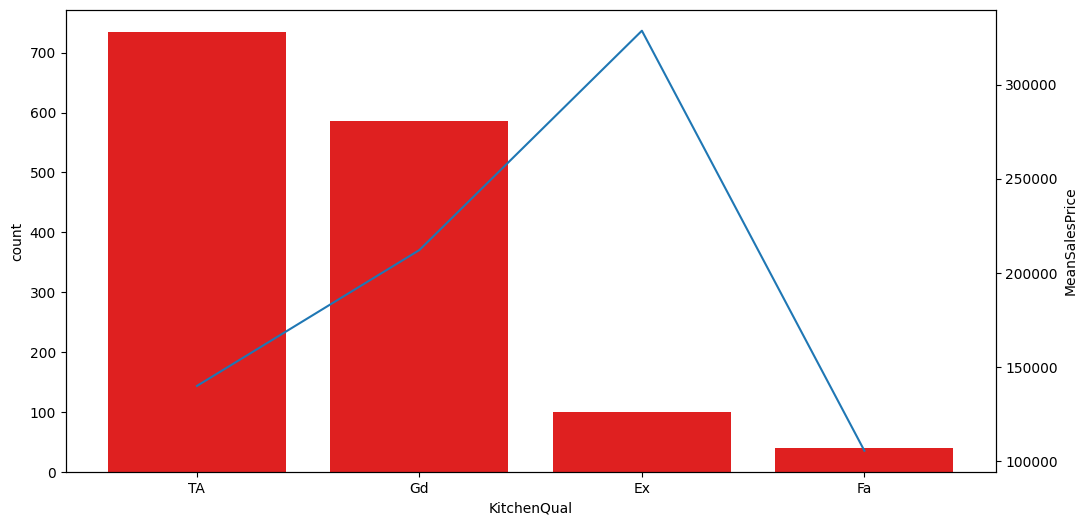

In [75]:
group = 'KitchenQual'
categorical_plot(df, group)

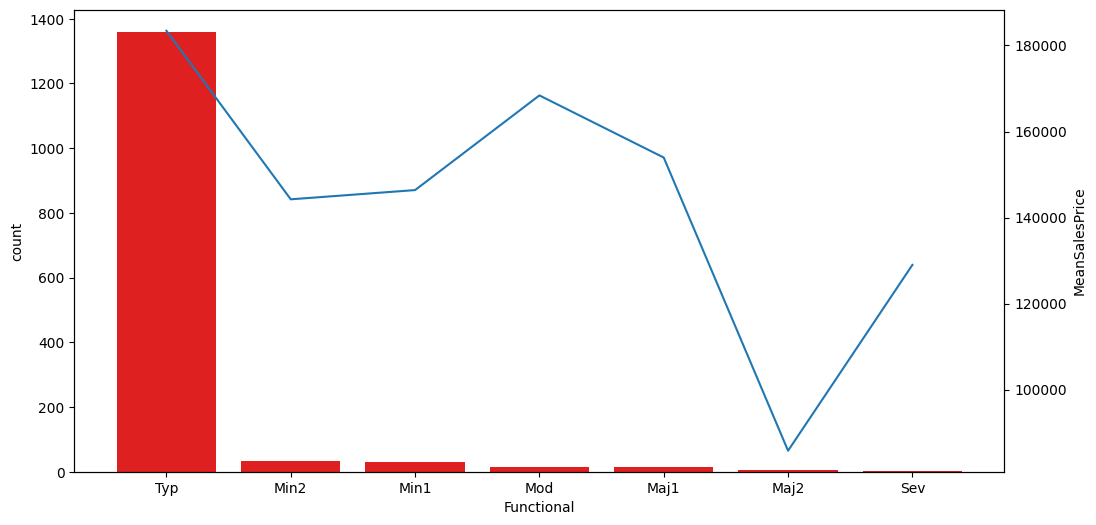

In [76]:
group = 'Functional'
categorical_plot(df, group)

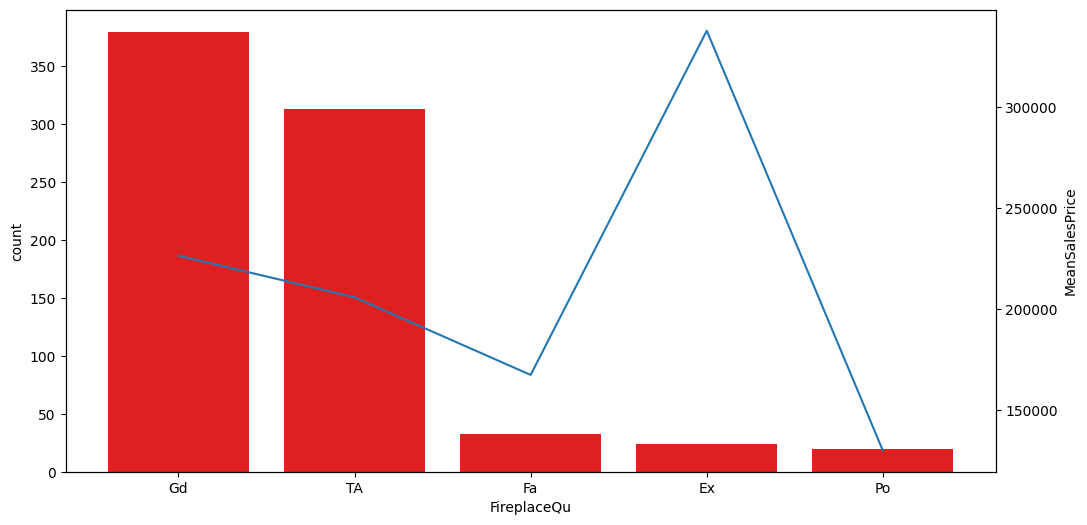

In [77]:
group = 'FireplaceQu'
categorical_plot(df, group)

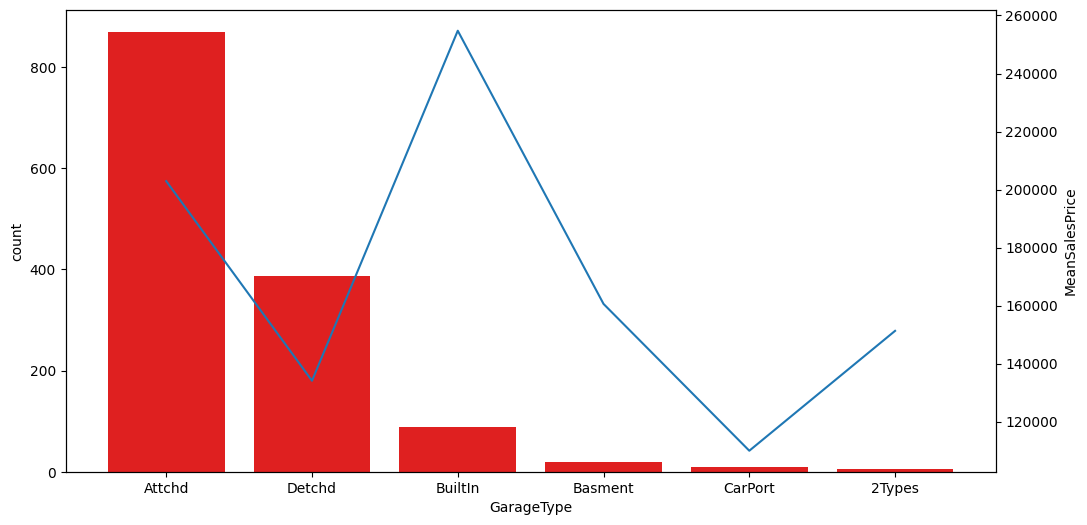

In [78]:
group = 'GarageType'
categorical_plot(df, group)

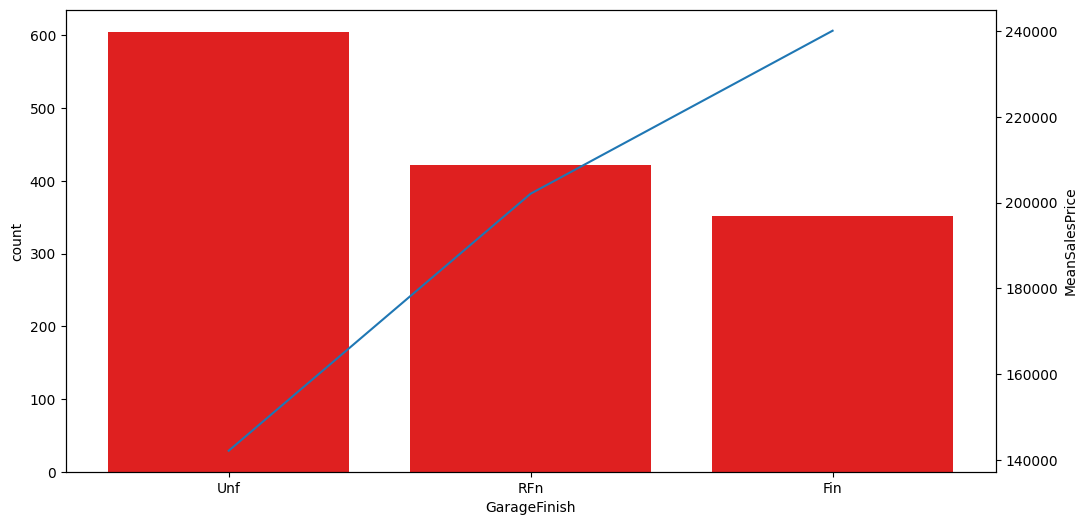

In [79]:
group = 'GarageFinish'
categorical_plot(df, group)

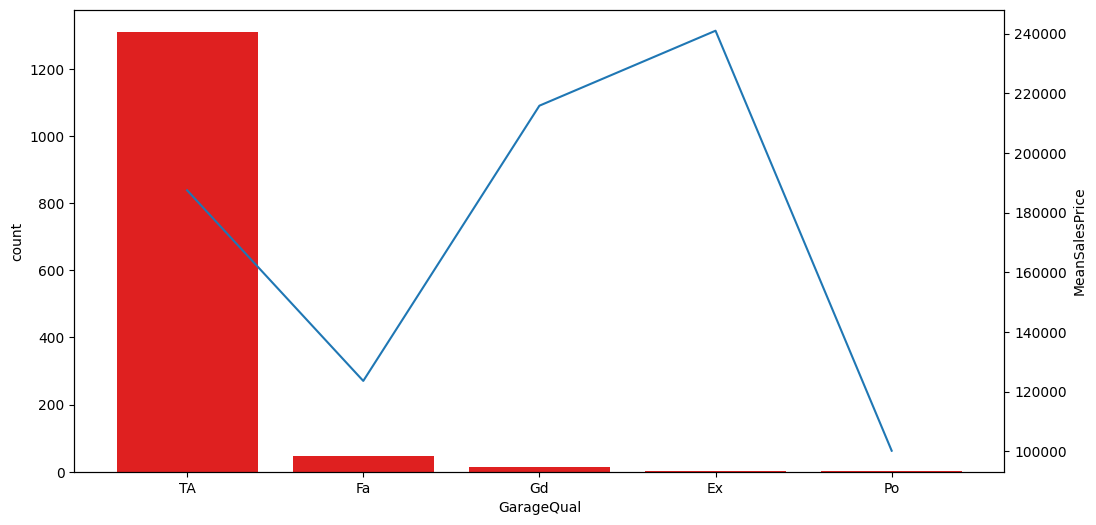

In [80]:
group = 'GarageQual'
categorical_plot(df, group)

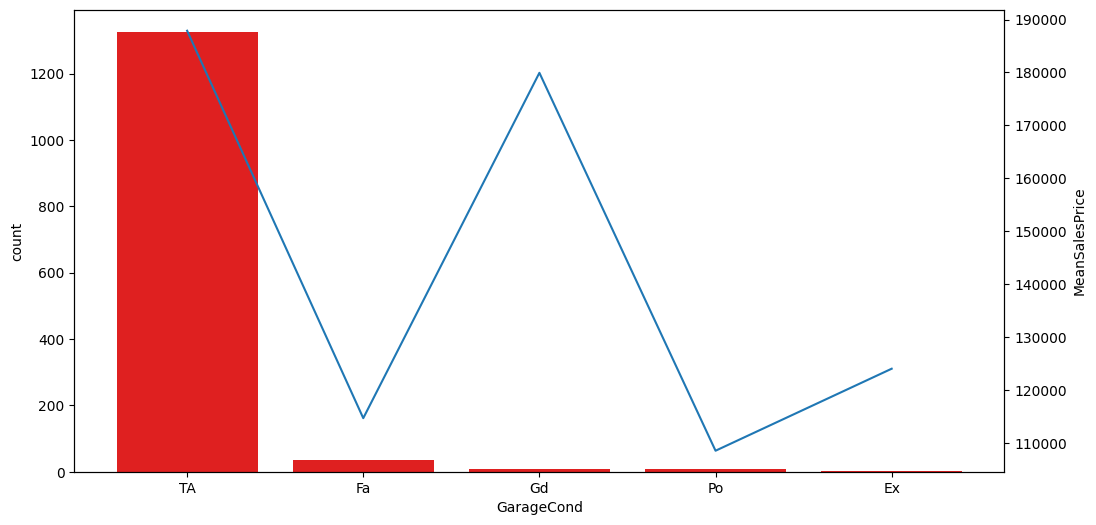

In [81]:
group = 'GarageCond'
categorical_plot(df, group)

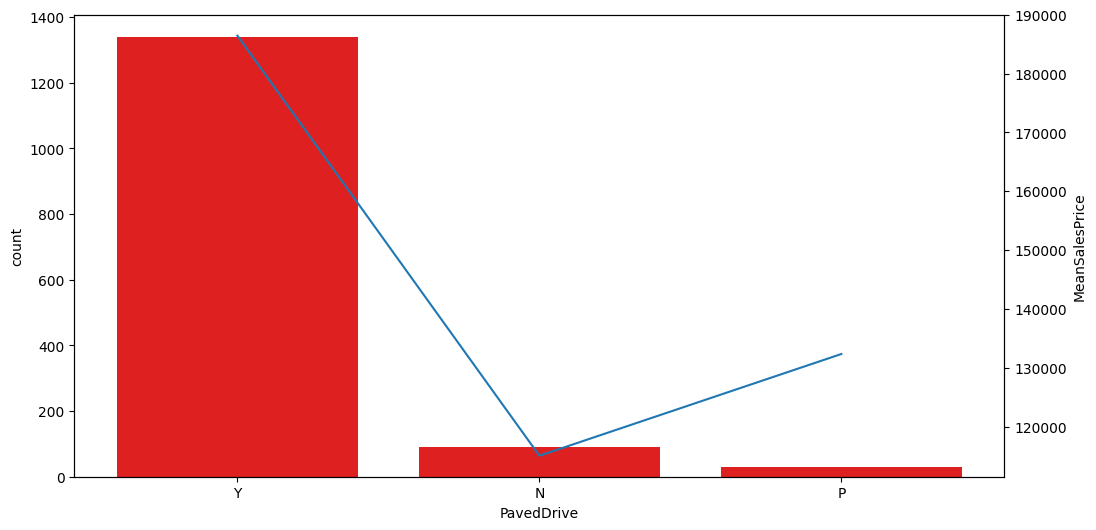

In [82]:
group = 'PavedDrive'
categorical_plot(df, group)

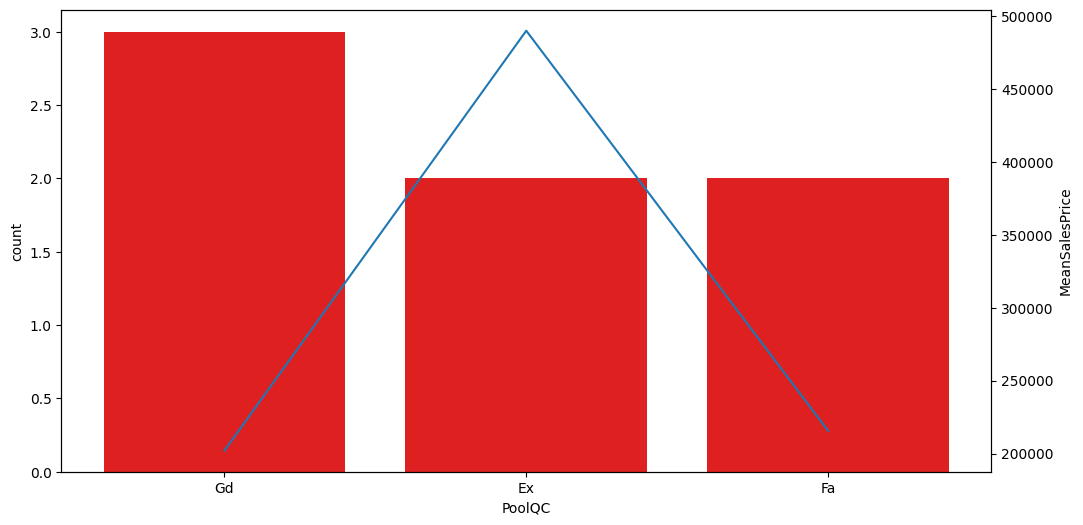

In [83]:
group = 'PoolQC'
categorical_plot(df, group)

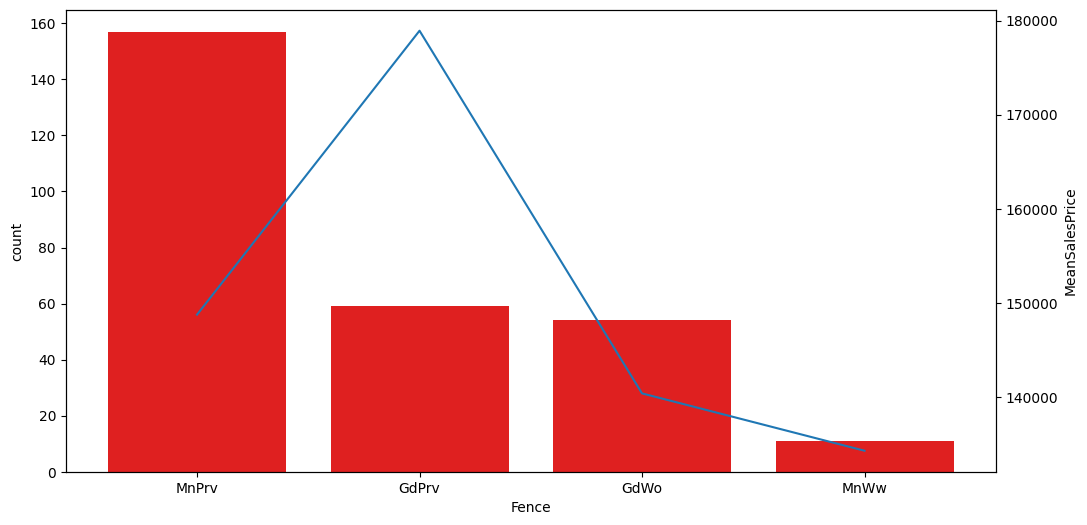

In [84]:
group = 'Fence'
categorical_plot(df, group)

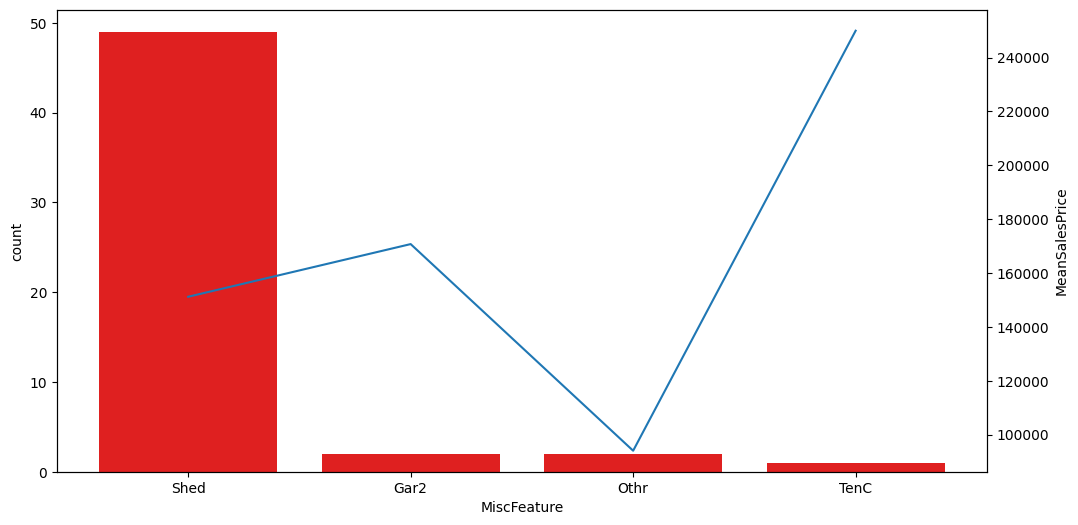

In [85]:
group = 'MiscFeature'
categorical_plot(df, group)

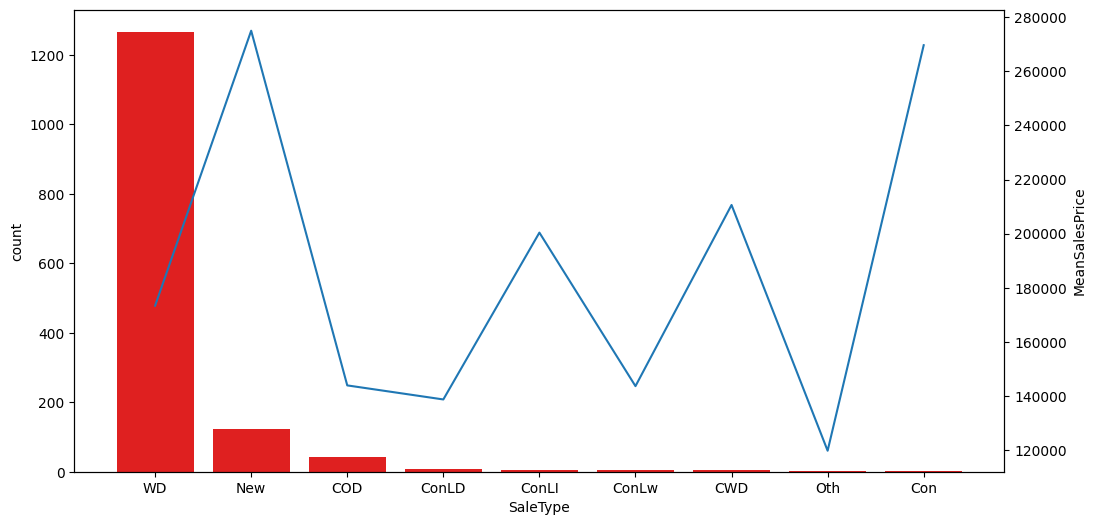

In [86]:
group = 'SaleType'
categorical_plot(df, group)

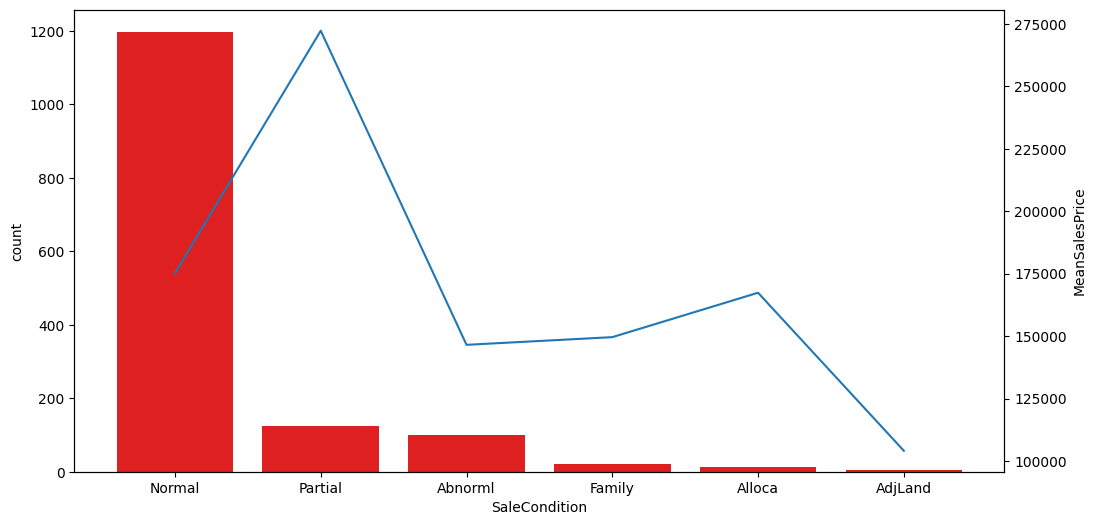

In [87]:
group = 'SaleCondition'
categorical_plot(df, group)

# Ordinal Categoricals

In [88]:
def categorical_ordinal_plot(df, group):
    grouped = df.groupby(group,as_index=False).agg({"Id": ["count"], "SalePrice": ["mean"]})
    grouped.columns = [group, 'count', 'MeanSalesPrice']
    grouped = grouped.sort_values(group, ascending = False)
    
    
    
    matplotlib.rc_file_defaults()
    ax1 = sns.set_style(style=None, rc=None )
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(x = grouped[group], y = grouped['count'], color = 'red')
    
    ax2 = ax1.twinx()
    sns.lineplot(x = grouped[group], y = grouped['MeanSalesPrice'])

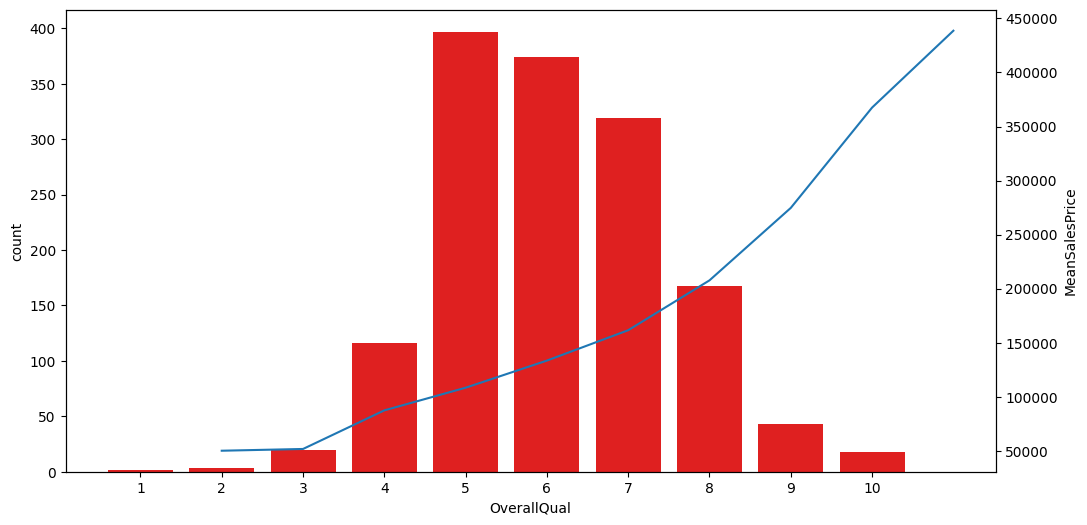

In [90]:
group = 'OverallQual'
categorical_plot(df, group)

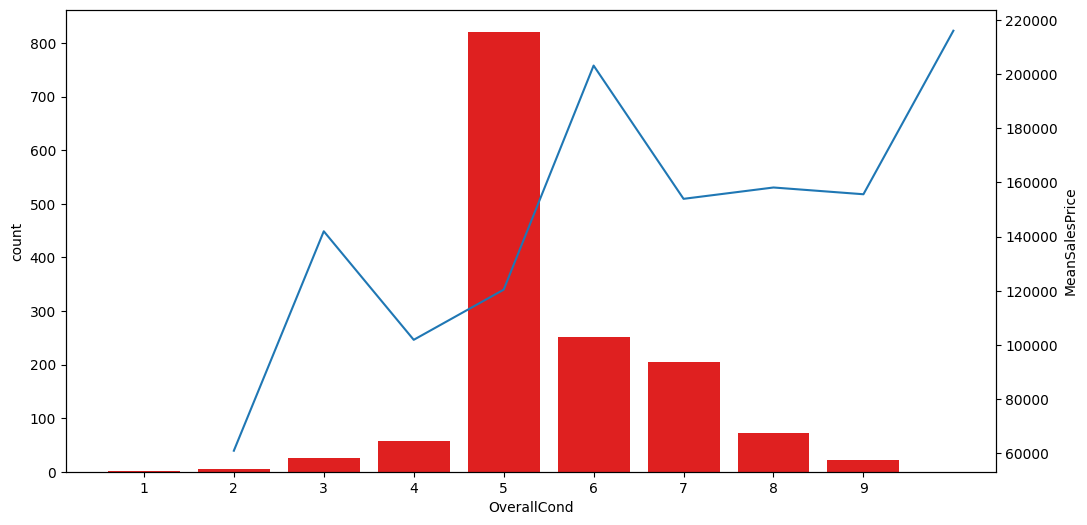

In [91]:
group = 'OverallCond'
categorical_plot(df, group)

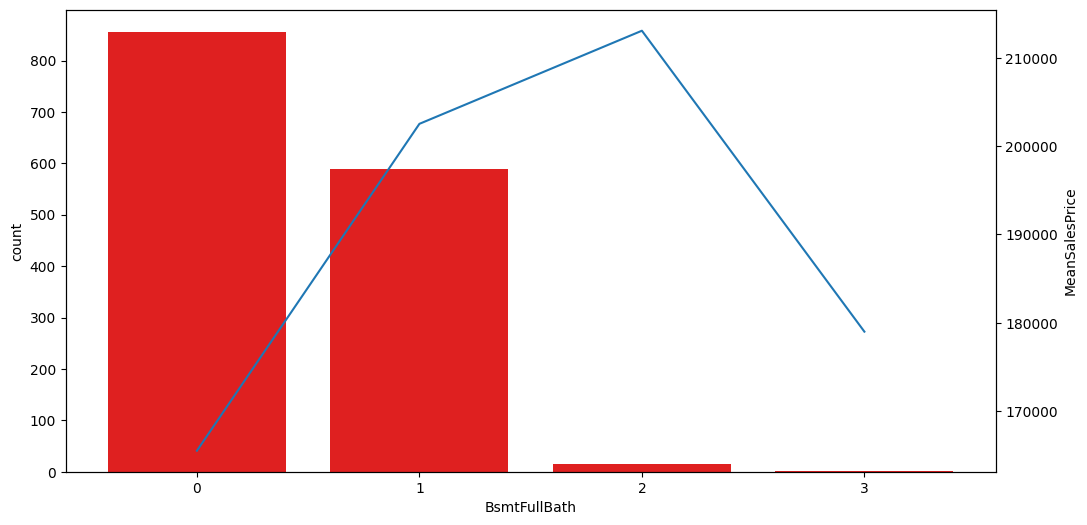

In [92]:
group = 'BsmtFullBath'
categorical_plot(df, group)

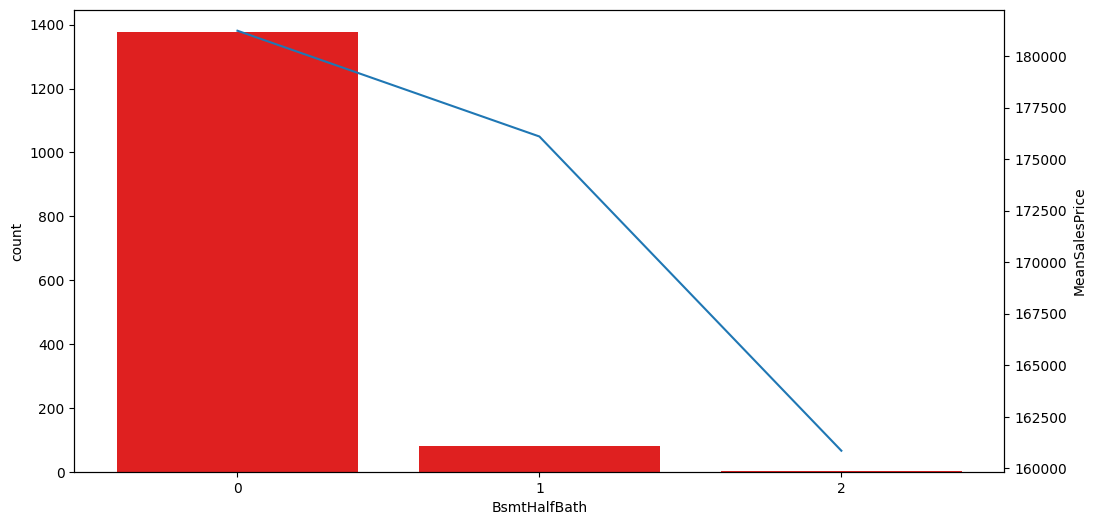

In [93]:
group = 'BsmtHalfBath'
categorical_plot(df, group)

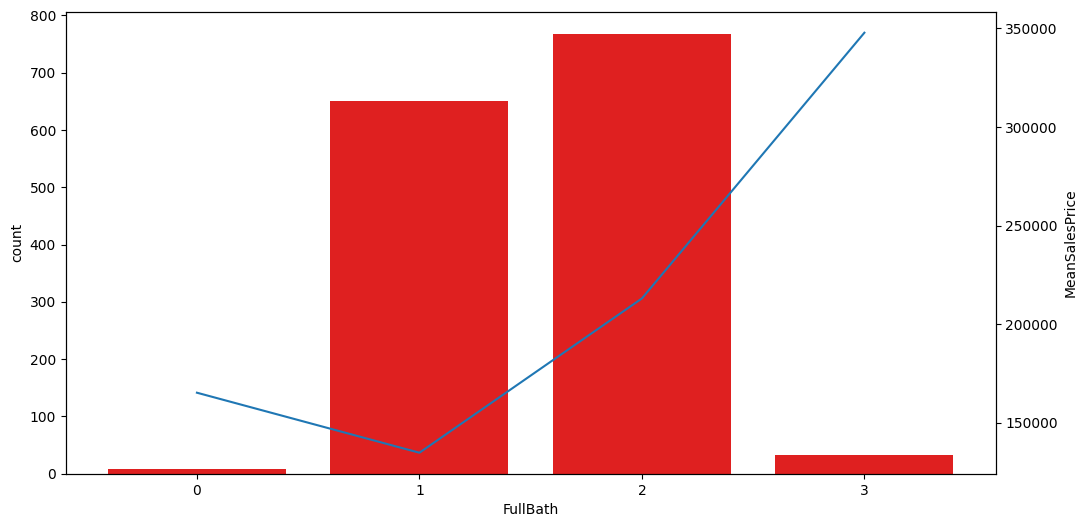

In [94]:
group = 'FullBath'
categorical_plot(df, group)

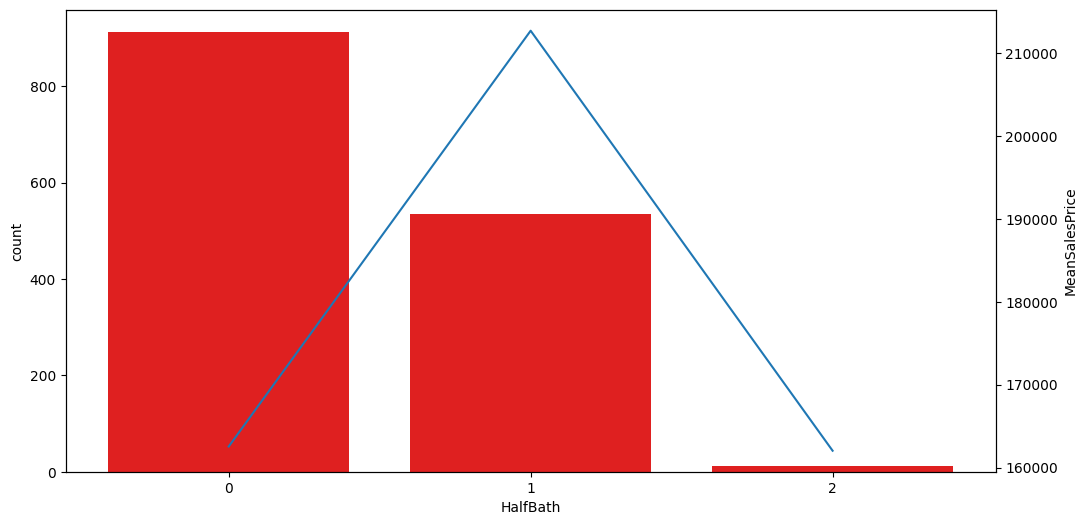

In [95]:
group = 'HalfBath'
categorical_plot(df, group)

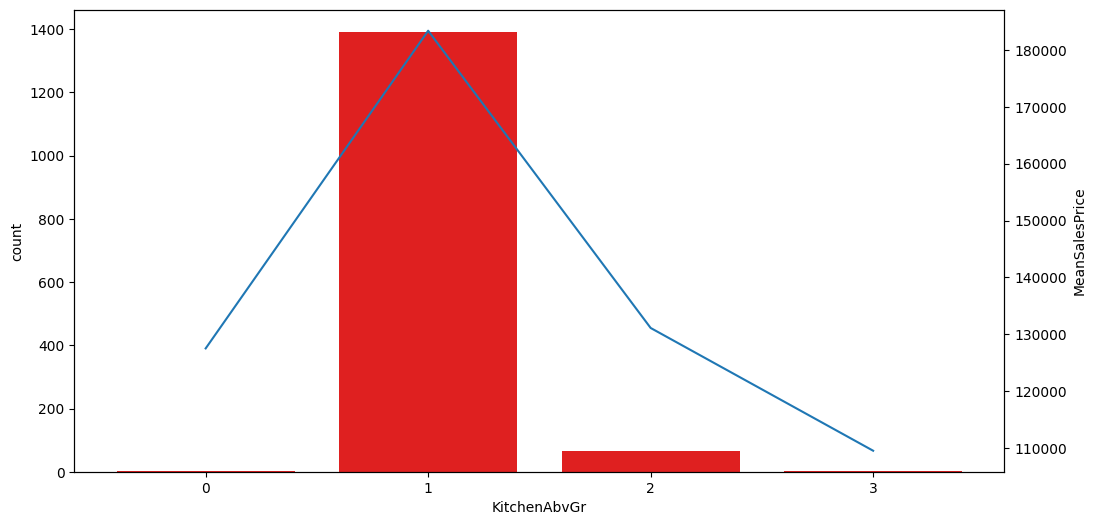

In [96]:
group = 'KitchenAbvGr'
categorical_plot(df, group)

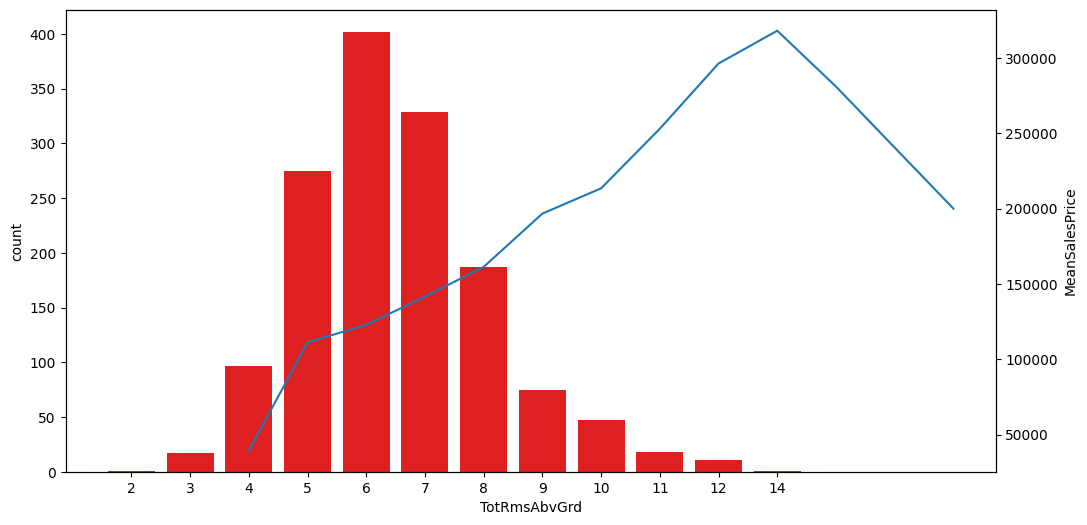

In [97]:
group = 'TotRmsAbvGrd'
categorical_plot(df, group)

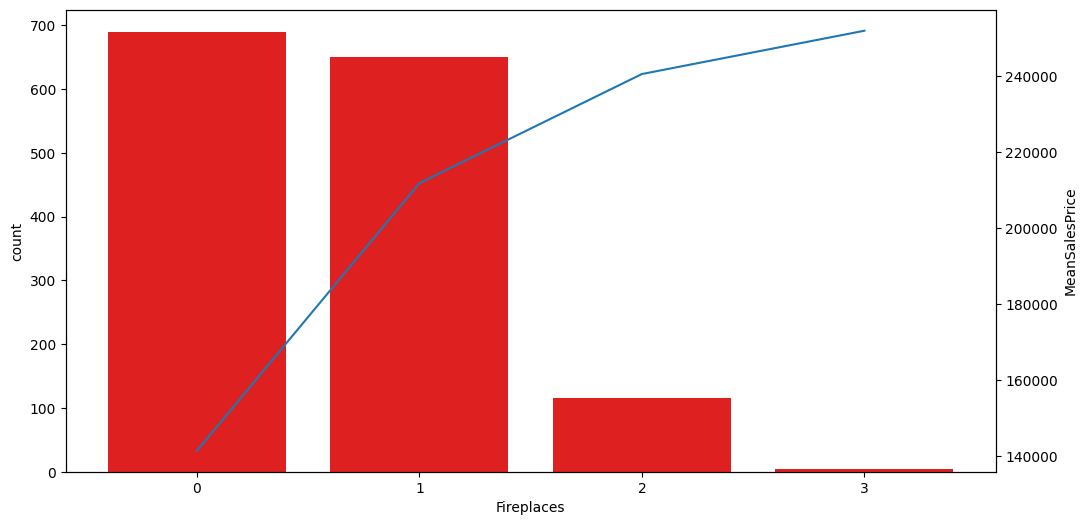

In [98]:
group = 'Fireplaces'
categorical_plot(df, group)

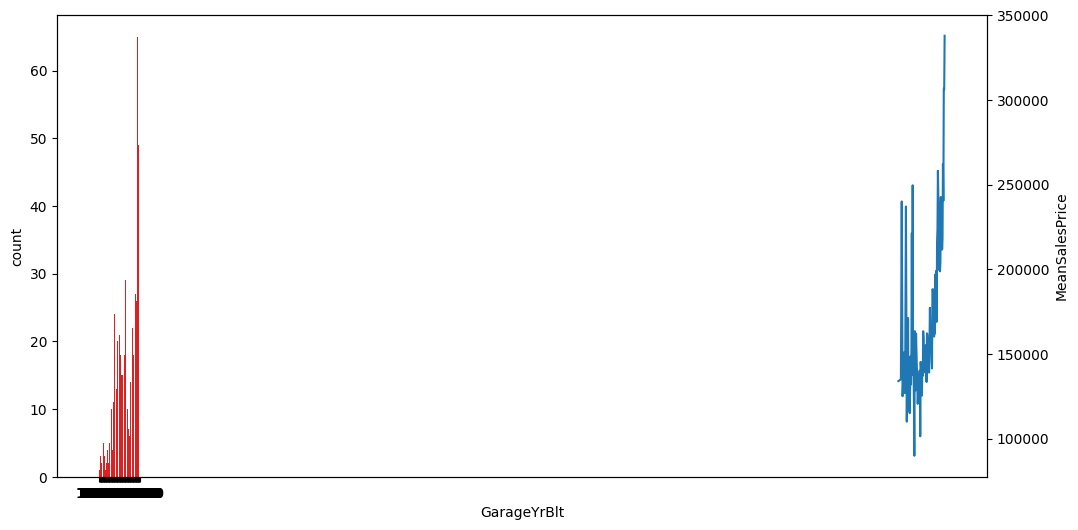

In [99]:
group = 'GarageYrBlt'
categorical_plot(df, group)

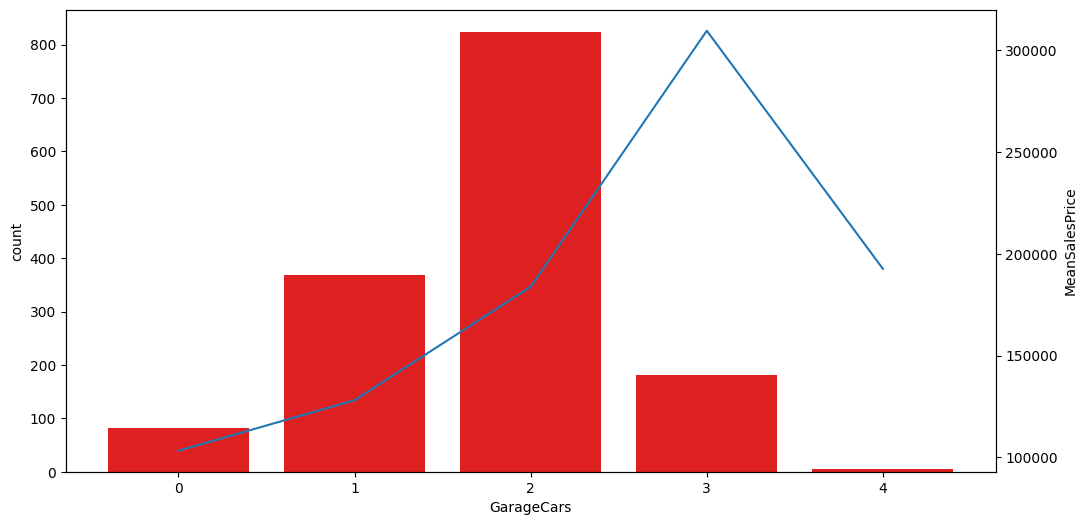

In [100]:
group = 'GarageCars'
categorical_plot(df, group)

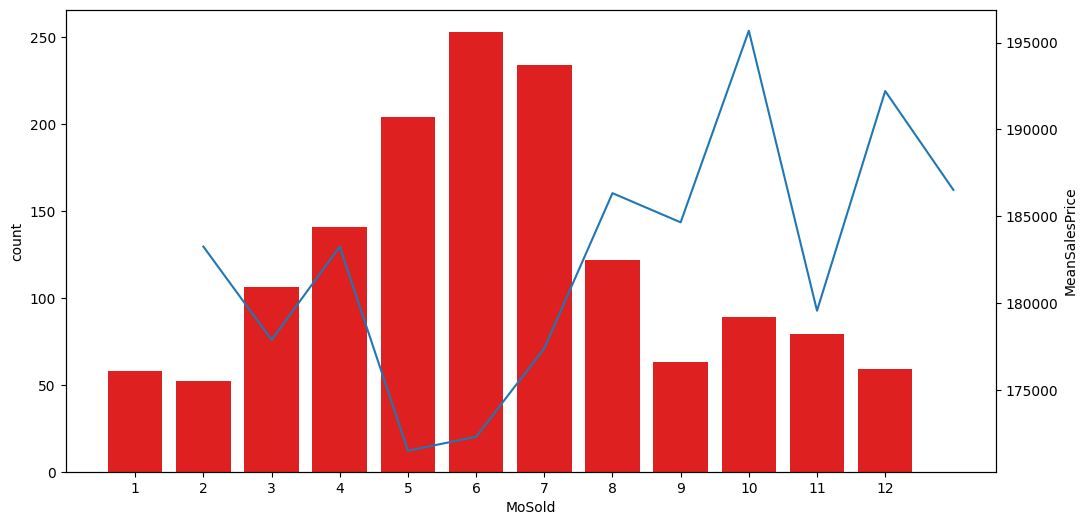

In [101]:
group = 'MoSold'
categorical_plot(df, group)

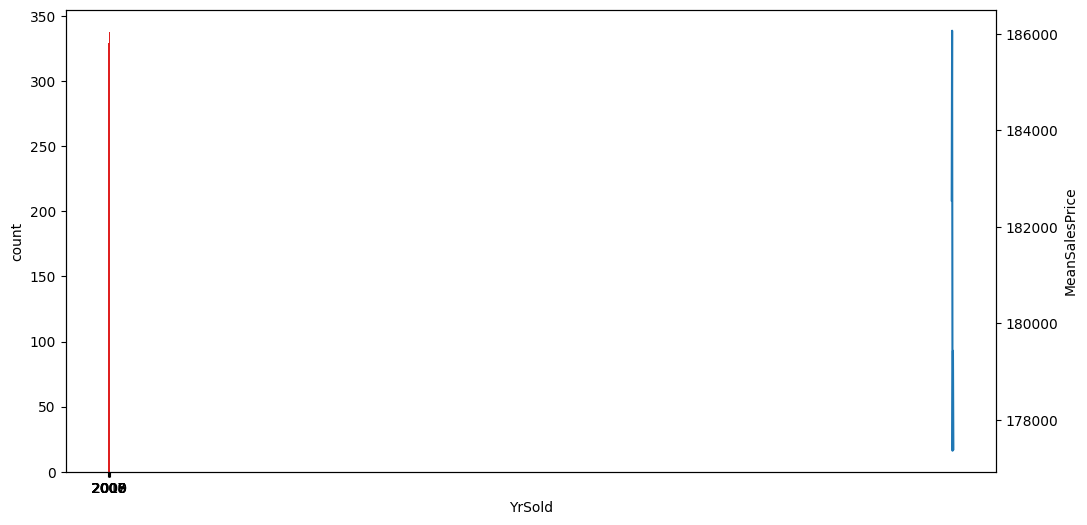

In [102]:
group = 'YrSold'
categorical_plot(df, group)

In [103]:
df.YrSold.unique

<bound method Series.unique of 0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64>